# Carrier on-time performance for the state of New York, 2018
## by Yasir Gani

## Data Gathering

> My dataset contains details of all flights to and from the state of New York, in the year 2018. It contains details of the destinations for outbound flights, origins for inbound flights, as well as on-time performance data, including taxi time to and from the runway, total minutes delayed (or early) and reasons for delay (carrier, weather, NAS (National Air System), security and late aircraft), for major US carriers.

> I was inspired to choose this dataset because, well, I LOVE to fly! Hearing the deep hum of the engines as they speed up with the fuel injection is music to my ears. Add to that the taxiing to the runway and seeing a queue of planes ahead of us taking off while we prepare for our journey in the sky is the perfect start to my holiday. I need a window seat.

> This dataset was interesting to me because it contains information on taxi times to and from the runway, which I am very curious about. It would be great to know if taxi times are greater on average for certain carriers than others, or if it increases based on the departure airport. Knowing this information might just help me choose my next flight more wisely to get the best out of my journey!

> I obtained this through the recommendation of Udacity as a dataset to be used in this investigation. The data can be downloaded from https://www.transtats.bts.gov/Fields.asp.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

import calendar

In [2]:
#import the data into a dataframe

df = pd.read_csv('2018_on_time_new_york_2.csv')
df.head()

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,OP_UNIQUE_CARRIER,ORIGIN,DEST,DEP_TIME,DEP_DELAY,DEP_DEL15,...,CANCELLED,DIVERTED,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY
0,1,27,6,27/01/2018,UA,DEN,LGA,736.0,-10.0,0.0,...,0,0,191.0,176.0,1620,NaN,NaN,NaN,NaN,NaN
1,1,27,6,27/01/2018,UA,IAH,LGA,1837.0,-10.0,0.0,...,0,0,183.0,157.0,1416,NaN,NaN,NaN,NaN,NaN
2,1,27,6,27/01/2018,UA,EWR,ROC,2059.0,-10.0,0.0,...,0,0,68.0,47.0,246,NaN,NaN,NaN,NaN,NaN
3,1,27,6,27/01/2018,UA,DEN,LGA,1011.0,-9.0,0.0,...,0,0,194.0,174.0,1620,NaN,NaN,NaN,NaN,NaN
4,1,27,6,27/01/2018,UA,LGA,ORD,1237.0,67.0,1.0,...,0,0,140.0,122.0,733,44.0,0.0,0.0,0.0,0.0


In [3]:
#determine the number of rows, cols in dataset

df.shape

(754989, 25)

754,989 entries of data, with 25 columns containing variables.

In [4]:
#checking the datatypes for each column

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 754989 entries, 0 to 754988
Data columns (total 25 columns):
MONTH                  754989 non-null int64
DAY_OF_MONTH           754989 non-null int64
DAY_OF_WEEK            754989 non-null int64
FL_DATE                754989 non-null object
OP_UNIQUE_CARRIER      754989 non-null object
ORIGIN                 754989 non-null object
DEST                   754989 non-null object
DEP_TIME               731454 non-null float64
DEP_DELAY              729255 non-null float64
DEP_DEL15              729255 non-null float64
TAXI_OUT               730466 non-null float64
TAXI_IN                729904 non-null float64
ARR_TIME               729905 non-null float64
ARR_DELAY              726933 non-null float64
ARR_DEL15              726933 non-null float64
CANCELLED              754989 non-null int64
DIVERTED               754989 non-null int64
ACTUAL_ELAPSED_TIME    727925 non-null float64
AIR_TIME               727925 non-null float64
DISTANCE  

## Wrangling<br>

> From the data above, the following datatypes need to be changed:<br>
- month needs to be in category format to indicate Jan - Dec months
- day of week needs to indicate the day in category
- fl_date needs to be converted to datetime
- I will interpret the data from the dep_time and arr_time columns to create categorical data as period of day
- delete duplicate rows
- filter out cancelled flights

> Also the columns need to be made lowercase for ease of coding, and the fields carrier_delay, weather_delay, nas_delay, decurity_delay, late_aircraft_delay need to be unpivoted.

In [5]:
#lower-case the column names
df.columns = [x.lower() for x in df.columns]

In [6]:
#confirm lower-case column names
df.head()

,month,day_of_month,day_of_week,fl_date,op_unique_carrier,origin,dest,dep_time,dep_delay,dep_del15,...,cancelled,diverted,actual_elapsed_time,air_time,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,1,27,6,27/01/2018,UA,DEN,LGA,736.0,-10.0,0.0,...,0,0,191.0,176.0,1620,NaN,NaN,NaN,NaN,NaN
1,1,27,6,27/01/2018,UA,IAH,LGA,1837.0,-10.0,0.0,...,0,0,183.0,157.0,1416,NaN,NaN,NaN,NaN,NaN
2,1,27,6,27/01/2018,UA,EWR,ROC,2059.0,-10.0,0.0,...,0,0,68.0,47.0,246,NaN,NaN,NaN,NaN,NaN
3,1,27,6,27/01/2018,UA,DEN,LGA,1011.0,-9.0,0.0,...,0,0,194.0,174.0,1620,NaN,NaN,NaN,NaN,NaN
4,1,27,6,27/01/2018,UA,LGA,ORD,1237.0,67.0,1.0,...,0,0,140.0,122.0,733,44.0,0.0,0.0,0.0,0.0


Column names are now lower case.

In [7]:
#convert month numbers to calendar names
df['month'] = df['month'].apply(lambda x: calendar.month_abbr[x])

In [8]:
#confirm the month names
df.head()

,month,day_of_month,day_of_week,fl_date,op_unique_carrier,origin,dest,dep_time,dep_delay,dep_del15,...,cancelled,diverted,actual_elapsed_time,air_time,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,Jan,27,6,27/01/2018,UA,DEN,LGA,736.0,-10.0,0.0,...,0,0,191.0,176.0,1620,NaN,NaN,NaN,NaN,NaN
1,Jan,27,6,27/01/2018,UA,IAH,LGA,1837.0,-10.0,0.0,...,0,0,183.0,157.0,1416,NaN,NaN,NaN,NaN,NaN
2,Jan,27,6,27/01/2018,UA,EWR,ROC,2059.0,-10.0,0.0,...,0,0,68.0,47.0,246,NaN,NaN,NaN,NaN,NaN
3,Jan,27,6,27/01/2018,UA,DEN,LGA,1011.0,-9.0,0.0,...,0,0,194.0,174.0,1620,NaN,NaN,NaN,NaN,NaN
4,Jan,27,6,27/01/2018,UA,LGA,ORD,1237.0,67.0,1.0,...,0,0,140.0,122.0,733,44.0,0.0,0.0,0.0,0.0


Month names have now replaced the numbers. Now to convert the months to category datatype, and convert fl_date to datetime.

In [9]:
#convert months to category
df['month'] = df['month'].astype('category')

In [10]:
#convert fl_date to datetime
df['fl_date'] = pd.to_datetime(df['fl_date'])

Now, create a dictionary to convert the day numbers to day names, then use replace to convert.

In [11]:
#convert day numbers to day names
#create dictionary of day numbers to names
week = {1:'Mon', 2:'Tue', 3:'Wed', 4:'Thu', 5:'Fri', 6:'Sat', 7:'Sun'}

In [12]:
#convert day numbers to names using dictionary
df['day_of_week'] = df['day_of_week'].replace(week)

In [13]:
#convert day names to category
df['day_of_week'] = df['day_of_week'].astype('category')

In [14]:
#confirm data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 754989 entries, 0 to 754988
Data columns (total 25 columns):
month                  754989 non-null category
day_of_month           754989 non-null int64
day_of_week            754989 non-null category
fl_date                754989 non-null datetime64[ns]
op_unique_carrier      754989 non-null object
origin                 754989 non-null object
dest                   754989 non-null object
dep_time               731454 non-null float64
dep_delay              729255 non-null float64
dep_del15              729255 non-null float64
taxi_out               730466 non-null float64
taxi_in                729904 non-null float64
arr_time               729905 non-null float64
arr_delay              726933 non-null float64
arr_del15              726933 non-null float64
cancelled              754989 non-null int64
diverted               754989 non-null int64
actual_elapsed_time    727925 non-null float64
air_time               727925 non-null floa

The most important columns of data are now in the correct datatype. Next: check for duplicates and remove them from the dataframe.

In [15]:
#check for cuplicates
df[df.duplicated(keep=False)]

,month,day_of_month,day_of_week,fl_date,op_unique_carrier,origin,dest,dep_time,dep_delay,dep_del15,...,cancelled,diverted,actual_elapsed_time,air_time,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
333,Jan,5,Fri,2018-05-01,UA,LGA,IAH,NaN,NaN,NaN,...,1,0,NaN,NaN,1416,NaN,NaN,NaN,NaN,NaN
339,Jan,5,Fri,2018-05-01,UA,LGA,IAH,NaN,NaN,NaN,...,1,0,NaN,NaN,1416,NaN,NaN,NaN,NaN,NaN
354,Jan,5,Fri,2018-05-01,UA,LGA,DEN,NaN,NaN,NaN,...,1,0,NaN,NaN,1620,NaN,NaN,NaN,NaN,NaN
358,Jan,5,Fri,2018-05-01,UA,LGA,ORD,NaN,NaN,NaN,...,1,0,NaN,NaN,733,NaN,NaN,NaN,NaN,NaN
360,Jan,5,Fri,2018-05-01,UA,LGA,DEN,NaN,NaN,NaN,...,1,0,NaN,NaN,1620,NaN,NaN,NaN,NaN,NaN
363,Jan,5,Fri,2018-05-01,UA,LGA,IAH,NaN,NaN,NaN,...,1,0,NaN,NaN,1416,NaN,NaN,NaN,NaN,NaN
364,Jan,5,Fri,2018-05-01,UA,LGA,ORD,NaN,NaN,NaN,...,1,0,NaN,NaN,733,NaN,NaN,NaN,NaN,NaN
369,Jan,5,Fri,2018-05-01,UA,LGA,ORD,NaN,NaN,NaN,...,1,0,NaN,NaN,733,NaN,NaN,NaN,NaN,NaN
372,Jan,5,Fri,2018-05-01,UA,LGA,ORD,NaN,NaN,NaN,...,1,0,NaN,NaN,733,NaN,NaN,NaN,NaN,NaN
383,Jan,4,Thu,2018-04-01,UA,LGA,IAH,NaN,NaN,NaN,...,1,0,NaN,NaN,1416,NaN,NaN,NaN,NaN,NaN


In [16]:
#drop the duplicate rows
df = df.drop_duplicates()

In [17]:
df.shape[0]

747356

The duplicate rows have now been eliminated from the dataframe, leaving 747,356 rows of unique data. Next, convert the dep_time and arr_time to daytime categories: <br>
- midnight to 6am: 'Night'
- 6am to 12pm: 'Morning'
- 12pm to 6pm: 'Afternoon'
- 6pm to midnight: 'Evening'

In [18]:
#add period of day for departures to enhance categorical data analysis

def flight(time):
    if 0 <= time < 600:
        return 'Night'
    elif 600 <= time < 1200:
        return 'Morning'
    elif 1200 <= time < 1800:
        return 'Afternoon'
    elif 1800 <= time <= 2400:
        return 'Evening'
    else:
        return np.nan

In [19]:
#confirming the max time value
df['dep_time'].max()

2400.0

In [20]:
#apply the flight function to convert dep_time to period of day
df['dep_period'] = df['dep_time'].apply(flight)

In [21]:
#confirming that null time values result in null day period categories
df[df['dep_time'].isnull()]

,month,day_of_month,day_of_week,fl_date,op_unique_carrier,origin,dest,dep_time,dep_delay,dep_del15,...,diverted,actual_elapsed_time,air_time,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,dep_period
294,Jan,6,Sat,2018-06-01,UA,ROC,EWR,NaN,NaN,NaN,...,0,NaN,NaN,246,NaN,NaN,NaN,NaN,NaN,NaN
333,Jan,5,Fri,2018-05-01,UA,LGA,IAH,NaN,NaN,NaN,...,0,NaN,NaN,1416,NaN,NaN,NaN,NaN,NaN,NaN
336,Jan,5,Fri,2018-05-01,UA,ROC,EWR,NaN,NaN,NaN,...,0,NaN,NaN,246,NaN,NaN,NaN,NaN,NaN,NaN
342,Jan,5,Fri,2018-05-01,UA,EWR,ROC,NaN,NaN,NaN,...,0,NaN,NaN,246,NaN,NaN,NaN,NaN,NaN,NaN
354,Jan,5,Fri,2018-05-01,UA,LGA,DEN,NaN,NaN,NaN,...,0,NaN,NaN,1620,NaN,NaN,NaN,NaN,NaN,NaN
358,Jan,5,Fri,2018-05-01,UA,LGA,ORD,NaN,NaN,NaN,...,0,NaN,NaN,733,NaN,NaN,NaN,NaN,NaN,NaN
380,Jan,4,Thu,2018-04-01,UA,BUF,EWR,NaN,NaN,NaN,...,0,NaN,NaN,282,NaN,NaN,NaN,NaN,NaN,NaN
383,Jan,4,Thu,2018-04-01,UA,LGA,IAH,NaN,NaN,NaN,...,0,NaN,NaN,1416,NaN,NaN,NaN,NaN,NaN,NaN
384,Jan,4,Thu,2018-04-01,UA,IAH,LGA,NaN,NaN,NaN,...,0,NaN,NaN,1416,NaN,NaN,NaN,NaN,NaN,NaN
386,Jan,4,Thu,2018-04-01,UA,ROC,EWR,NaN,NaN,NaN,...,0,NaN,NaN,246,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
#add period of day for arrivals to enhance categorical data analysis
df['arr_period'] = df['arr_time'].apply(flight)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 747356 entries, 0 to 754988
Data columns (total 27 columns):
month                  747356 non-null category
day_of_month           747356 non-null int64
day_of_week            747356 non-null category
fl_date                747356 non-null datetime64[ns]
op_unique_carrier      747356 non-null object
origin                 747356 non-null object
dest                   747356 non-null object
dep_time               731454 non-null float64
dep_delay              729255 non-null float64
dep_del15              729255 non-null float64
taxi_out               730466 non-null float64
taxi_in                729904 non-null float64
arr_time               729905 non-null float64
arr_delay              726933 non-null float64
arr_del15              726933 non-null float64
cancelled              747356 non-null int64
diverted               747356 non-null int64
actual_elapsed_time    727925 non-null float64
air_time               727925 non-null floa

In [24]:
#create a second dataframe filtered for data containing minutes delay under different circumstances

df_delay = df[(df['carrier_delay'].notnull()) | (df['weather_delay'].notnull()) | (df['nas_delay'].notnull())
             | (df['security_delay'].notnull()) | (df['late_aircraft_delay'].notnull())]

In [25]:
#check how many rows contain delay types data
df_delay.shape[0]

159333

In [26]:
#unpivot the data based on all columns, except the delay type times

df_delay = pd.melt(df_delay, id_vars=['month','day_of_month','day_of_week','fl_date',
                                      'op_unique_carrier','origin','dest','dep_time',
                                      'dep_delay','dep_del15','taxi_out','taxi_in','arr_time',
                                      'arr_delay','arr_del15','cancelled','diverted','actual_elapsed_time',
                                      'air_time','distance','dep_period','arr_period'], 
                   value_vars=['carrier_delay','weather_delay','nas_delay','security_delay','late_aircraft_delay'])

In [27]:
#confirm the unpivot
df_delay.head()

,month,day_of_month,day_of_week,fl_date,op_unique_carrier,origin,dest,dep_time,dep_delay,dep_del15,...,arr_del15,cancelled,diverted,actual_elapsed_time,air_time,distance,dep_period,arr_period,variable,value
0,Jan,27,Sat,2018-01-27,UA,LGA,ORD,1237.0,67.0,1.0,...,1.0,0,0,140.0,122.0,733,Afternoon,Afternoon,carrier_delay,44.0
1,Jan,26,Fri,2018-01-26,UA,ORD,LGA,1828.0,23.0,1.0,...,1.0,0,0,136.0,104.0,733,Evening,Evening,carrier_delay,23.0
2,Jan,26,Fri,2018-01-26,UA,EWR,ROC,2224.0,84.0,1.0,...,1.0,0,0,59.0,44.0,246,Evening,Evening,carrier_delay,56.0
3,Jan,25,Thu,2018-01-25,UA,LGA,IAH,1207.0,-3.0,0.0,...,1.0,0,0,274.0,211.0,1416,Afternoon,Afternoon,carrier_delay,0.0
4,Jan,25,Thu,2018-01-25,UA,LGA,ORD,1207.0,7.0,0.0,...,1.0,0,0,169.0,117.0,733,Afternoon,Afternoon,carrier_delay,7.0


In [28]:
#checking the shape of the resulting dataframe
df_delay.shape[0]

796665

In [29]:
#filter out delay time values that have a value of 0 - these are delay types not causing delays to their respective flights
df_delay_1 = df_delay[df_delay['value'] != 0]

In [30]:
#number of rows in the resilting dataframe
df_delay_1.shape[0]

258138

In [31]:
#filter for null value delay types - these are flights with no delay type info
df_no_delay = df_delay = df[(df['carrier_delay'].isnull()) | (df['weather_delay'].isnull()) | (df['nas_delay'].isnull())
             | (df['security_delay'].isnull()) | (df['late_aircraft_delay'].isnull())]

In [32]:
df_no_delay.shape[0]

588023

In [33]:
df_no_delay.head()

,month,day_of_month,day_of_week,fl_date,op_unique_carrier,origin,dest,dep_time,dep_delay,dep_del15,...,actual_elapsed_time,air_time,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,dep_period,arr_period
0,Jan,27,Sat,2018-01-27,UA,DEN,LGA,736.0,-10.0,0.0,...,191.0,176.0,1620,NaN,NaN,NaN,NaN,NaN,Morning,Afternoon
1,Jan,27,Sat,2018-01-27,UA,IAH,LGA,1837.0,-10.0,0.0,...,183.0,157.0,1416,NaN,NaN,NaN,NaN,NaN,Evening,Evening
2,Jan,27,Sat,2018-01-27,UA,EWR,ROC,2059.0,-10.0,0.0,...,68.0,47.0,246,NaN,NaN,NaN,NaN,NaN,Evening,Evening
3,Jan,27,Sat,2018-01-27,UA,DEN,LGA,1011.0,-9.0,0.0,...,194.0,174.0,1620,NaN,NaN,NaN,NaN,NaN,Morning,Afternoon
5,Jan,26,Fri,2018-01-26,UA,ORD,LGA,2048.0,-15.0,0.0,...,125.0,96.0,733,NaN,NaN,NaN,NaN,NaN,Evening,Evening


Now that the delay types have been unpivoted and the flights with  no delay types associated with them have been separated out, I will format the two resulting dataframes and then concatenate them to give me an unpivoted dataframe containing all flights.

In [34]:
#drop excess columns so shape matches df_delay_1
df_no_delay.drop(columns=['nas_delay','security_delay','late_aircraft_delay'], inplace=True)

/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [35]:
#rename the two columns to set up the concatenation of the two dataframes
df_no_delay.rename(columns={'carrier_delay': 'delay_type', 'weather_delay': 'delay_type_mins'}, inplace=True)

/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:3781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


In [36]:
#confirming col name changes
df_no_delay.head(1)

,month,day_of_month,day_of_week,fl_date,op_unique_carrier,origin,dest,dep_time,dep_delay,dep_del15,...,arr_del15,cancelled,diverted,actual_elapsed_time,air_time,distance,delay_type,delay_type_mins,dep_period,arr_period
0,Jan,27,Sat,2018-01-27,UA,DEN,LGA,736.0,-10.0,0.0,...,0.0,0,0,191.0,176.0,1620,NaN,NaN,Morning,Afternoon


In [37]:
#rename columns for concatenation
df_delay_1.rename(columns={'variable': 'delay_type', 'value': 'delay_type_mins'}, inplace=True)

In [38]:
#confirm col name change
df_delay_1.head()

,month,day_of_month,day_of_week,fl_date,op_unique_carrier,origin,dest,dep_time,dep_delay,dep_del15,...,arr_del15,cancelled,diverted,actual_elapsed_time,air_time,distance,dep_period,arr_period,delay_type,delay_type_mins
0,Jan,27,Sat,2018-01-27,UA,LGA,ORD,1237.0,67.0,1.0,...,1.0,0,0,140.0,122.0,733,Afternoon,Afternoon,carrier_delay,44.0
1,Jan,26,Fri,2018-01-26,UA,ORD,LGA,1828.0,23.0,1.0,...,1.0,0,0,136.0,104.0,733,Evening,Evening,carrier_delay,23.0
2,Jan,26,Fri,2018-01-26,UA,EWR,ROC,2224.0,84.0,1.0,...,1.0,0,0,59.0,44.0,246,Evening,Evening,carrier_delay,56.0
4,Jan,25,Thu,2018-01-25,UA,LGA,ORD,1207.0,7.0,0.0,...,1.0,0,0,169.0,117.0,733,Afternoon,Afternoon,carrier_delay,7.0
6,Jan,24,Wed,2018-01-24,UA,IAH,LGA,1935.0,55.0,1.0,...,1.0,0,0,176.0,153.0,1416,Evening,Evening,carrier_delay,8.0


In [39]:
df_no_delay.head()

,month,day_of_month,day_of_week,fl_date,op_unique_carrier,origin,dest,dep_time,dep_delay,dep_del15,...,arr_del15,cancelled,diverted,actual_elapsed_time,air_time,distance,delay_type,delay_type_mins,dep_period,arr_period
0,Jan,27,Sat,2018-01-27,UA,DEN,LGA,736.0,-10.0,0.0,...,0.0,0,0,191.0,176.0,1620,NaN,NaN,Morning,Afternoon
1,Jan,27,Sat,2018-01-27,UA,IAH,LGA,1837.0,-10.0,0.0,...,0.0,0,0,183.0,157.0,1416,NaN,NaN,Evening,Evening
2,Jan,27,Sat,2018-01-27,UA,EWR,ROC,2059.0,-10.0,0.0,...,0.0,0,0,68.0,47.0,246,NaN,NaN,Evening,Evening
3,Jan,27,Sat,2018-01-27,UA,DEN,LGA,1011.0,-9.0,0.0,...,0.0,0,0,194.0,174.0,1620,NaN,NaN,Morning,Afternoon
5,Jan,26,Fri,2018-01-26,UA,ORD,LGA,2048.0,-15.0,0.0,...,0.0,0,0,125.0,96.0,733,NaN,NaN,Evening,Evening


Now to create a master dataframe of wrangled data:

In [40]:
#concatenate the two dataframes
df_master = pd.concat([df_delay_1,df_no_delay])

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


In [41]:
#check how many rows in master dataframe
df_master.shape[0]

846161

At the moment df_master has 846161 rows, whereas df had 747356 rows before the delay scenario times was unpivoted. This is because some flights had more than one cause of delay, so they appear twice in df_master, but with different delay scenario times.

In [42]:
#checking that dropping duplicates on all columns except delay scenario and delay scenario times produces the same amount
#of rows as df before data was unpivoted

df_master.drop_duplicates(subset=['month','day_of_month','day_of_week','fl_date',
                                      'op_unique_carrier','origin','dest','dep_time',
                                      'dep_delay','dep_del15','taxi_out','taxi_in','arr_time',
                                      'arr_delay','arr_del15','cancelled','diverted','actual_elapsed_time',
                                      'air_time','distance']).shape[0]

747356

In [43]:
df_master.head()

,actual_elapsed_time,air_time,arr_del15,arr_delay,arr_period,arr_time,cancelled,day_of_month,day_of_week,delay_type,...,dep_time,dest,distance,diverted,fl_date,month,op_unique_carrier,origin,taxi_in,taxi_out
0,140.0,122.0,1.0,44.0,Afternoon,1357.0,0,27,Sat,carrier_delay,...,1237.0,ORD,733,0,2018-01-27,Jan,UA,LGA,2.0,16.0
1,136.0,104.0,1.0,24.0,Evening,2144.0,0,26,Fri,carrier_delay,...,1828.0,LGA,733,0,2018-01-26,Jan,UA,ORD,4.0,28.0
2,59.0,44.0,1.0,64.0,Evening,2323.0,0,26,Fri,carrier_delay,...,2224.0,ROC,246,0,2018-01-26,Jan,UA,EWR,6.0,9.0
4,169.0,117.0,1.0,15.0,Afternoon,1356.0,0,25,Thu,carrier_delay,...,1207.0,ORD,733,0,2018-01-25,Jan,UA,LGA,3.0,49.0
6,176.0,153.0,1.0,20.0,Evening,2331.0,0,24,Wed,carrier_delay,...,1935.0,LGA,1416,0,2018-01-24,Jan,UA,IAH,3.0,20.0


In [44]:
df_master.describe()

,actual_elapsed_time,air_time,arr_del15,arr_delay,arr_time,cancelled,day_of_month,delay_type_mins,dep_del15,dep_delay,dep_time,distance,diverted,taxi_in,taxi_out
count,826730.000000,826730.000000,825738.000000,825738.000000,828710.000000,846161.000000,846161.000000,258138.000000,828060.000000,828060.000000,830259.000000,846161.000000,846161.000000,828709.000000,829271.000000
mean,155.482021,124.304444,0.312615,15.350660,1483.059839,0.020062,15.765864,44.819542,0.289428,20.596383,1360.508204,876.419385,0.002900,8.420110,22.769842
std,81.231026,78.939471,0.463559,65.559398,562.866107,0.140214,8.718487,69.171164,0.453497,61.673637,504.793427,656.454365,0.053775,7.003699,14.293013
min,33.000000,18.000000,0.000000,-104.000000,1.000000,0.000000,1.000000,1.000000,0.000000,-49.000000,1.000000,94.000000,0.000000,1.000000,1.000000
25%,97.000000,66.000000,0.000000,-17.000000,1059.000000,0.000000,8.000000,12.000000,0.000000,-5.000000,936.000000,395.000000,0.000000,5.000000,14.000000
50%,136.000000,104.000000,0.000000,-4.000000,1527.000000,0.000000,16.000000,24.000000,0.000000,-1.000000,1355.000000,733.000000,0.000000,7.000000,19.000000
75%,182.000000,149.000000,1.000000,24.000000,1938.000000,0.000000,23.000000,52.000000,1.000000,21.000000,1758.000000,1076.000000,0.000000,10.000000,27.000000
max,744.000000,696.000000,1.000000,2692.000000,2400.000000,1.000000,31.000000,2692.000000,1.000000,2710.000000,2400.000000,4983.000000,1.000000,258.000000,178.000000


In [45]:
#filter for flights that were not cancelled
df_master = df_master[df_master['cancelled'] == 0]

In [46]:
#filter out columns of data where there are null values, except in the case of delay_type and delay_type_mins
df_master = df_master.dropna(subset=['month','day_of_month','day_of_week','fl_date',
                                      'op_unique_carrier','origin','dest','dep_time',
                                      'dep_delay','dep_del15','taxi_out','taxi_in','arr_time',
                                      'arr_delay','arr_del15','cancelled','diverted','actual_elapsed_time',
                                      'air_time','distance'])

Drop the dep_time and arr_time columns as they are not needed.

In [47]:
#drop dep_time and arr_time columns
df_master = df_master.drop(columns = ['arr_time','dep_time'])

In [48]:
df_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 823655 entries, 0 to 754988
Data columns (total 22 columns):
actual_elapsed_time    823655 non-null float64
air_time               823655 non-null float64
arr_del15              823655 non-null float64
arr_delay              823655 non-null float64
arr_period             823655 non-null object
cancelled              823655 non-null int64
day_of_month           823655 non-null int64
day_of_week            823655 non-null category
delay_type             257980 non-null object
delay_type_mins        257980 non-null float64
dep_del15              823655 non-null float64
dep_delay              823655 non-null float64
dep_period             823655 non-null object
dest                   823655 non-null object
distance               823655 non-null int64
diverted               823655 non-null int64
fl_date                823655 non-null datetime64[ns]
month                  823655 non-null category
op_unique_carrier      823655 non-null object


I will also need a dataframe containing one row for each unique flight, so they do not get double counted.

In [49]:
#remove duplicate instances of flights (which were previously there because of multiple types of delays)
df_master_unique = df_master.drop_duplicates(subset=['month','day_of_month','day_of_week','fl_date',
                                      'op_unique_carrier','origin','dest',
                                      'dep_delay','dep_del15','taxi_out','taxi_in',
                                      'arr_delay','arr_del15','cancelled','diverted','actual_elapsed_time',
                                      'air_time','distance'])

Write the master dataframe to csv so the wrangled data can be easily loaded into the slide deck notebook later on.

In [50]:
#write df_master to csv so that it can be easily loaded for the slide deck notebook
df_master.to_csv('df_master.csv')

In [51]:

df_master_unique.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 724843 entries, 0 to 754988
Data columns (total 22 columns):
actual_elapsed_time    724843 non-null float64
air_time               724843 non-null float64
arr_del15              724843 non-null float64
arr_delay              724843 non-null float64
arr_period             724843 non-null object
cancelled              724843 non-null int64
day_of_month           724843 non-null int64
day_of_week            724843 non-null category
delay_type             159175 non-null object
delay_type_mins        159175 non-null float64
dep_del15              724843 non-null float64
dep_delay              724843 non-null float64
dep_period             724843 non-null object
dest                   724843 non-null object
distance               724843 non-null int64
diverted               724843 non-null int64
fl_date                724843 non-null datetime64[ns]
month                  724843 non-null category
op_unique_carrier      724843 non-null object


In [52]:
df_master['op_unique_carrier'].unique()

array(['UA', 'AS', '9E', 'B6', 'EV', 'F9', 'G4', 'HA', 'MQ', 'NK', 'OH',
       'OO', 'VX', 'WN', 'YV', 'YX', 'AA', 'DL'], dtype=object)

In [53]:
df_master['origin'].unique()

array(['LGA', 'ORD', 'EWR', 'IAH', 'DEN', 'BUF', 'ALB', 'PDX', 'JFK',
       'IND', 'RDU', 'JAX', 'RSW', 'SYR', 'MSY', 'BNA', 'CLE', 'MCI',
       'ORF', 'PIT', 'CVG', 'DTW', 'DCA', 'ELM', 'ROC', 'BTV', 'IAD',
       'SAV', 'HPN', 'BOS', 'DFW', 'CLT', 'DAY', 'TYS', 'MSN', 'RIC',
       'CMH', 'PWM', 'BGR', 'CHS', 'BWI', 'MSP', 'CAE', 'CHO', 'TPA',
       'SRQ', 'STL', 'MCO', 'SAN', 'FLL', 'PBI', 'LAX', 'SWF', 'DAB',
       'SFO', 'LAS', 'BQN', 'AUS', 'SJU', 'PSP', 'SMF', 'SEA', 'SJC',
       'PHX', 'HOU', 'SLC', 'BUR', 'LGB', 'RNO', 'OAK', 'BHM', 'MEM',
       'GSO', 'ATL', 'GRR', 'XNA', 'MDT', 'OMA', 'LEX', 'ISP', 'MIA',
       'SFB', 'PBG', 'PGD', 'PIE', 'IAG', 'HNL', 'ILM', 'SDF', 'PHL',
       'CAK', 'BGM', 'ITH', 'DAL', 'MDW', 'MKE', 'EGE', 'SAT', 'PSE',
       'ABQ', 'OGS', 'ROA', 'MYR', 'MTJ', 'MHT', 'DSM', 'GSP', 'AGS',
       'ERI', 'STT', 'ACK', 'ORH', 'MVY', 'HYA', 'CHA', 'BZN', 'TVC',
       'ONT', 'SNA', 'JAC', 'ART', 'AVL', 'SBN'], dtype=object)

In [54]:
df_master['origin'].nunique()

123

In the dataset there were 123 airports of origin collected. Not all of these are in the state of NY though.

In [55]:
df_master['delay_type'].unique()

array(['carrier_delay', 'weather_delay', 'nas_delay', 'security_delay',
       'late_aircraft_delay', nan], dtype=object)

### What is the structure of your dataset?

> The dataset contains 823,655 rows of data, containing 724,850 civil aviation flights flown in and out of New York state in 2018. The data contains 22 different variables, most of which are numeric. The air_time, arr_delay, delay_type_mins, dep_delay, taxi_in and taxi_out are all measured in minutes, whereas the arr_time and dep_time were categorised into period of day. The day_of_week, month, arr_period and dep_period are all categorical values that are ordinal in that they have a specific order: days of the week, months of the year, and periods of day(morning, afternoon, evening, night).<br>

> The period of day is split into groups of six hours:<br>
- midnight to 6am: **night**
- 6am to 12pm: **morning**
- 12pm to 6pm: **afternoon**
- 6pm to midnight: **evening**

> Distance is covered in kilometers. Carriers are denoted by a unique combination of two letters, whereas airports are denoted by a unique combination of three letters.

### What is/are the main feature(s) of interest in your dataset?

> I am particularly interested in which type of delay is causes the largest delay in time, as well as whether carrier, airports or delay types cause the longest taxi times to and from the the runway.

> I want to determine which carrier, airport and period of day was the worst to fly, and which was the best to fy in terms of delays.

> I want to determine which carrier and airport will give me the longest taxi time too.

> I want to investigate this dataset from the perspective of the passenger, and the time-delay they incur in their journeys, rather than the aircraft/route itself.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I expect weather delays to have the biggest impact on flight times, while  believe taxi times could be affected by nas_delays (delays within the control of the National Airspace System). I also expect New York's JFK to have the longest taxi time without any specific delay type, simply due to the large and busy nature of the airport.

## Univariate Exploration


I will begin by investigating just how many flights took place at each period of day.

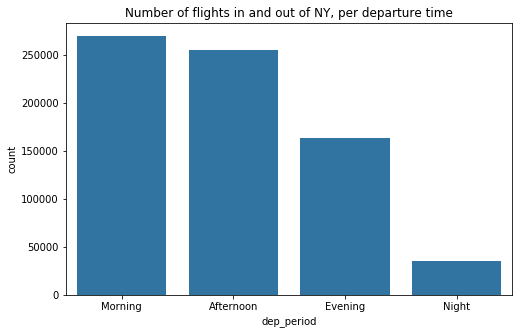

In [56]:
#plot countplot for categorical data

plt.figure(figsize=[8,5])
color = sb.color_palette()[0]
time_period = ['Morning', 'Afternoon', 'Evening', 'Night']
sb.countplot(data = df_master_unique, x = 'dep_period', color=color, order=time_period)
plt.title('Number of flights in and out of NY, per departure time');

Clearly the busiest time in US airspace was in the morning or afternoon with over 250,000 flights each, between 6am and 6pm, with very little flights in the small hours. Evening time was less busy but still significant with over 150,000 flights operating.

Next, let's take a look at the number of flights per carrier:

In [57]:
#define a function to plot horizontal countplots

def h_countplot(d,y,s):
    plt.figure(figsize=[8,5])
    sb.countplot(data = d, y = y, color = color, order = s);

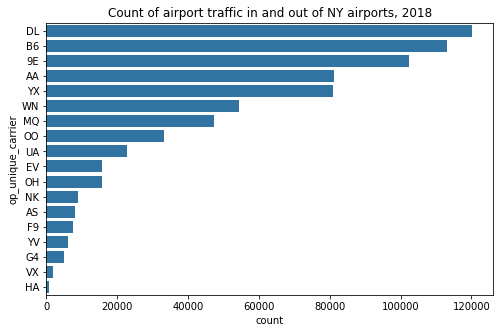

In [58]:
#plot countplot of carriers
type_counts = df_master_unique['op_unique_carrier'].value_counts().index
h_countplot(d=df_master_unique, y='op_unique_carrier', s = type_counts)
plt.title('Count of airport traffic in and out of NY airports, 2018');

Delta Airlines had the most number of domestic flights operating in and out of NY, closely followed by JetBlue and Endeavour Air. These three had by far the most amount of flights, after which American Airlines and Republic Airline. I did not expect to see United Airlines so far down the order with the number of domestic flights. However this may be down to the codeshare agreements between airlines, resulting in some United customers flying on aircraft desiganated as other carriers.

Let's look closer at the proportion of flights operated by the top 5 carriers:

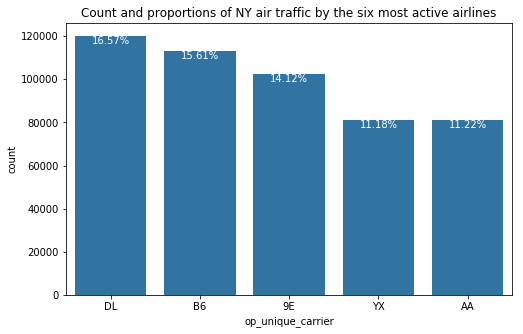

In [59]:
#plot relative frequency graph of carriers
plt.figure(figsize=[8,5])
carriers = ['DL','B6','9E','YX','AA']
sb.countplot(data = df_master_unique, x = 'op_unique_carrier', color = color, order=carriers)

# add annotations
n_points = df_master_unique.shape[0]
cat_counts = df_master_unique['op_unique_carrier'].value_counts()
locs, labels = plt.xticks() # get the current tick locations and labels

# loop through each pair of locations and labels
for loc, label in zip(locs, labels):

    # get the text property for the label to get the correct count
    count = cat_counts[label.get_text()]
    pct_string = '{:0.2f}%'.format(100*count/n_points)

    # print the annotation just below the top of the bar
    plt.text(loc, count-8, pct_string, ha = 'center', va='top', color = 'w')

plt.title('Count and proportions of NY air traffic by the six most active airlines');

Delta accounted for over 16% of the flights in and out of NY in 2018. Which is significant given there were 18 carriers in the dataset.

Which airport was the busiest for departures and arrivals? I expect JFK to be followed by LGA, but further investigation will prove whether my predictions are correct:

In [60]:
#start by filtering for airports in NY only

ny = ['JFK','BUF','ALB','HPN','LGA','ROC','SYR','ELM','ISP','ITH']

In [61]:
#filter the dataset for flights departing NY or arriving into NY using the airport list ny
ny_dep = df_master_unique[df_master_unique['origin'].isin(ny)]
ny_arr = df_master_unique[df_master_unique['dest'].isin(ny)]

In [62]:
#define function to plot two countplots together horizontally

def h_countplot_2(d,y,s,t,d1,y1,s1,t1):
    fig, ax = plt.subplots(nrows=2, figsize = [8,10])
    sb.countplot(data = d, y = y, color=color, order=s, ax=ax[0])
    ax[0].set_title(t)
    sb.countplot(data = d1, y = y1, color=color, order=s1, ax=ax[1]);
    ax[1].set_title(t1)

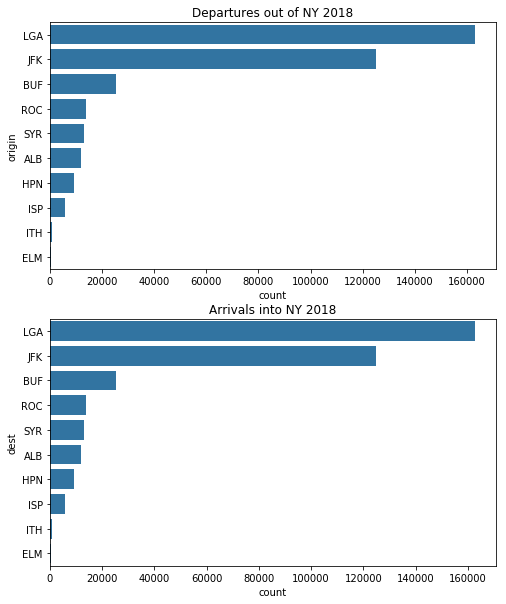

In [63]:
#plot countplots for each airport for departures and arrivals
airports_dep = ny_dep['origin'].value_counts().index
airports_arr = ny_arr['dest'].value_counts().index

h_countplot_2(d=ny_dep, y='origin', s=airports_dep, t='Departures out of NY 2018', 
              d1=ny_arr, y1='dest', s1=airports_arr, t1='Arrivals into NY 2018');

I did not expect that, LGA has many more departures and arrivals than JFK! Perhaps this is because they are classed as more of a regional airport than JFK, what with the vast number of international flights that operate in and out of JFK daily.<br>
<br>
In third place lies BUF, which handles far fewer flights than the msin two, but still significnantly more than the rest of the airports in NY.<br>
<br>
A picture is beginning to develop of the air traffic around each airport. Based on my analysis so far, I may be wrong in assuming JFK will have the longest taxi times.

In [64]:
#checking how many flights in and out of NY there were in 2018, and checking the difference
ny_dep.shape[0] - ny_arr.shape[0]

479

Looking at the comparison above of departures and arrivals, the pattern of the counts is very similar. This will be because, every flight that lands into NY, will still leave NY a few hours later, so the expectation would be that the number of departures and arrivals are very close, as proven with a difference of 53 flights.

Now to consider how flights are distributed across the different months and days of the week.

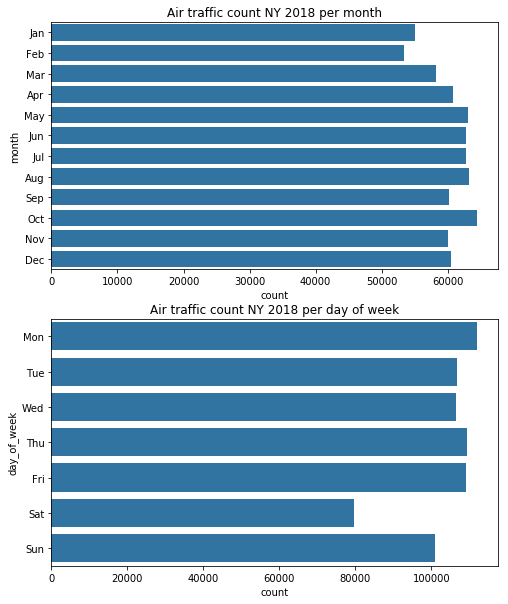

In [65]:
#plot countplots of total flights for each month and each day of the week
months = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
days = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']

h_countplot_2(d=df_master_unique, y='month', s=months, t='Air traffic count NY 2018 per month', 
              d1=df_master_unique, y1='day_of_week', s1=days, t1='Air traffic count NY 2018 per day of week');

Interestingly, the least air traffic was noted on Saturdays. This would go against my expectations as I have always thought the weekend to have the largest movement due to weekend getaways. However this is better explained by the Thursdays and Fridays having almost the highest movement. Perhaps by Saturday people have already made their journeys for their weekend getaways. Mondays were the busiest, This may be explained by business travellers.<br>
<br>
October was the busiest month for air traffic, followed by summer months, which could be high due to the summer holidays.<br>
<br>
This data would point me in the direction of expecting the largest number of delays in October or the summer months, with particular focus on Mondays, Thursdays and Fridays.

How many flights were delayed in 2018:

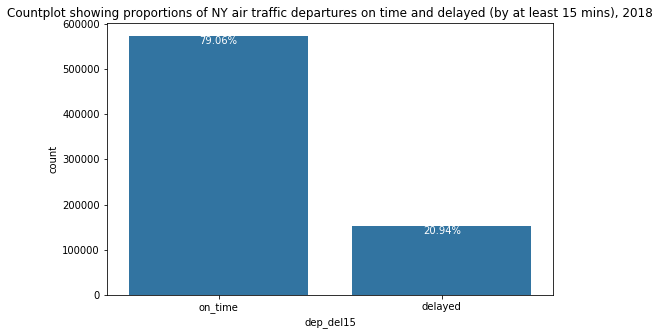

In [66]:
#plot countplot of delayed aircraft departures
plt.figure(figsize = [8,5])

ax = sb.countplot(data = df_master_unique, x = 'dep_del15', color=color)

total = float(df_master_unique.shape[0])
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height,
            '{:0.2f}%'.format(100*height/total),va='top',ha='center', color='w') 
plt.xticks(np.arange(2), ('on_time', 'delayed'))
plt.title('Countplot showing proportions of NY air traffic departures on time and delayed (by at least 15 mins), 2018');

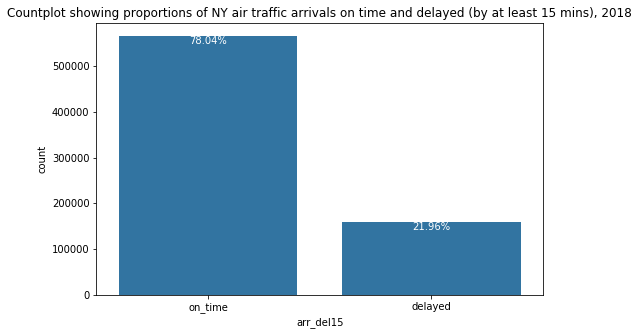

In [67]:
#plot countplot of delayed aircraft arrivals
plt.figure(figsize = [8,5])

ax = sb.countplot(data = df_master_unique, x = 'arr_del15', color=color)

total = float(df_master_unique.shape[0])
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height,
            '{:0.2f}%'.format(100*height/total),va='top',ha='center', color='w') 
plt.xticks(np.arange(2), ('on_time', 'delayed'))
plt.title('Countplot showing proportions of NY air traffic arrivals on time and delayed (by at least 15 mins), 2018');

The proportions of departures and arrivals that were on time or delayed were very similar. However, departures out of NY seemed to be slightly better than arrivals into NY, with an on_time rate of 79% versus 78% respectively.

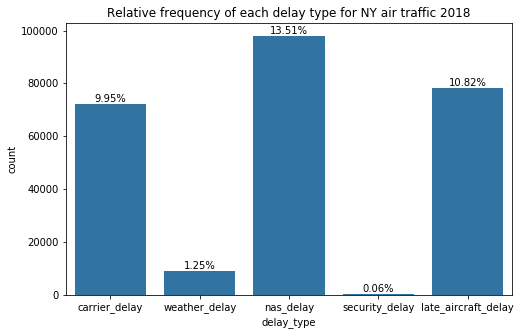

In [68]:
#plot relative frequency graph of delay types
plt.figure(figsize=[8,5])
carriers = ['carrier_delay', 'weather_delay', 'nas_delay', 'security_delay','late_aircraft_delay']
sb.countplot(data = df_master, x = 'delay_type', color = color, order=carriers)

# add annotations
n_points = df_master_unique.shape[0]
cat_counts = df_master['delay_type'].value_counts()
locs, labels = plt.xticks() # get the current tick locations and labels

# loop through each pair of locations and labels
for loc, label in zip(locs, labels):

    # get the text property for the label to get the correct count
    count = cat_counts[label.get_text()]
    pct_string = '{:0.2f}%'.format(100*count/n_points)

    # print the annotation just below the top of the bar
    plt.text(loc, count-8, pct_string, ha = 'center', va='bottom')
    
plt.title('Relative frequency of each delay type for NY air traffic 2018');

Clearly the biggest delay type was nas_delay with 14%, followed by late_aircraft with 11%. Interestingly weather had very little cause in the noted delays, while security delays were extremely low.

How do the delay times vary? If the delay time in dep_delay or arr_delay is 0 or less, then it was on time or early. If greater than 0, it was late.

In [69]:
#check the max and min values of each numerical data column to help create bin sizes in histograms
df_master_unique.describe()

,actual_elapsed_time,air_time,arr_del15,arr_delay,cancelled,day_of_month,delay_type_mins,dep_del15,dep_delay,distance,diverted,taxi_in,taxi_out
count,724843.000000,724843.000000,724843.000000,724843.000000,724843.0,724843.000000,159175.000000,724843.000000,724843.000000,724843.000000,724843.0,724843.000000,724843.000000
mean,154.589932,124.580916,0.219599,6.137415,0.0,15.877808,48.272166,0.209437,12.946448,886.100487,0.0,8.254157,21.754859
std,81.853850,79.703872,0.413975,55.195608,0.0,8.747000,77.113555,0.406907,51.747042,666.030960,0.0,6.590558,13.022004
min,33.000000,18.000000,0.000000,-104.000000,0.0,1.000000,1.000000,0.000000,-49.000000,94.000000,0.0,1.000000,1.000000
25%,96.000000,65.000000,0.000000,-19.000000,0.0,8.000000,14.000000,0.000000,-6.000000,395.000000,0.0,5.000000,13.000000
50%,135.000000,104.000000,0.000000,-8.000000,0.0,16.000000,25.000000,0.000000,-3.000000,733.000000,0.0,7.000000,18.000000
75%,180.000000,149.000000,0.000000,10.000000,0.0,23.000000,54.000000,0.000000,9.000000,1080.000000,0.0,10.000000,26.000000
max,744.000000,696.000000,1.000000,2692.000000,0.0,31.000000,2692.000000,1.000000,2710.000000,4983.000000,0.0,258.000000,178.000000


Looking at departures first.

In [70]:
#define function to plot histograms

def histo(d,x,b):
    plt.figure(figsize=[8,5])
    plt.hist(data = d, x = x, bins = b)

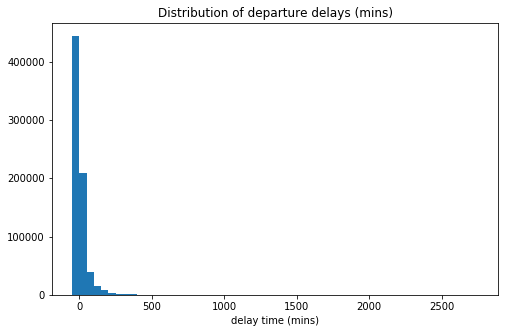

In [71]:
#start with standard histogram
binsize = 50
bins = np.arange(-50, df_master_unique['dep_delay'].max()+binsize, binsize)

histo(d=df_master_unique, x='dep_delay', b=bins)
plt.xlabel('delay time (mins)')
plt.title('Distribution of departure delays (mins)');

There is clearly a long tail in the histogram, indicating some possible outliers at the higher end of the departure delays. Also most flights were in the distribution below 0 (on time) so we can look at this on a log scale.

Let's look at the outliers for departures that were delayed more than 24 hours:

In [72]:
#departures delayed by more than 1,440 minutes (24 hours)
df_master[df_master['dep_delay'] > 1440]

,actual_elapsed_time,air_time,arr_del15,arr_delay,arr_period,cancelled,day_of_month,day_of_week,delay_type,delay_type_mins,...,dep_period,dest,distance,diverted,fl_date,month,op_unique_carrier,origin,taxi_in,taxi_out
2419,219.0,194.0,1.0,1473.0,Morning,0,6,Sat,carrier_delay,1125.0,...,Morning,JFK,1576,0,2018-06-01,Jan,B6,BQN,6.0,19.0
5382,600.0,558.0,1.0,1717.0,Morning,0,3,Wed,carrier_delay,35.0,...,Evening,JFK,4983,0,2018-03-01,Jan,HA,HNL,26.0,16.0
10477,268.0,244.0,1.0,2023.0,Night,0,11,Thu,carrier_delay,2007.0,...,Evening,JFK,1746,0,2018-11-01,Jan,AA,EGE,14.0,10.0
36760,133.0,62.0,1.0,1685.0,Evening,0,27,Fri,carrier_delay,695.0,...,Evening,JFK,290,0,2018-04-27,Apr,9E,ORF,14.0,57.0
145047,246.0,200.0,1.0,1505.0,Afternoon,0,18,Sun,carrier_delay,1385.0,...,Afternoon,FLL,1334,0,2018-11-18,Nov,G4,PBG,6.0,40.0
164715,600.0,558.0,1.0,1717.0,Morning,0,3,Wed,weather_delay,1682.0,...,Evening,JFK,4983,0,2018-03-01,Jan,HA,HNL,26.0,16.0
250804,108.0,79.0,1.0,2692.0,Morning,0,5,Thu,weather_delay,2692.0,...,Morning,JFK,541,0,2018-05-07,Jul,OO,CLT,12.0,17.0
329143,268.0,244.0,1.0,2023.0,Night,0,11,Thu,nas_delay,16.0,...,Evening,JFK,1746,0,2018-11-01,Jan,AA,EGE,14.0,10.0
355426,133.0,62.0,1.0,1685.0,Evening,0,27,Fri,nas_delay,26.0,...,Evening,JFK,290,0,2018-04-27,Apr,9E,ORF,14.0,57.0
463713,246.0,200.0,1.0,1505.0,Afternoon,0,18,Sun,nas_delay,120.0,...,Afternoon,FLL,1334,0,2018-11-18,Nov,G4,PBG,6.0,40.0


In [73]:
#departures delayed by more than 1,440 minutes (24 hours)
df_master[df_master['arr_delay'] > 1440]

,actual_elapsed_time,air_time,arr_del15,arr_delay,arr_period,cancelled,day_of_month,day_of_week,delay_type,delay_type_mins,...,dep_period,dest,distance,diverted,fl_date,month,op_unique_carrier,origin,taxi_in,taxi_out
2419,219.0,194.0,1.0,1473.0,Morning,0,6,Sat,carrier_delay,1125.0,...,Morning,JFK,1576,0,2018-06-01,Jan,B6,BQN,6.0,19.0
5382,600.0,558.0,1.0,1717.0,Morning,0,3,Wed,carrier_delay,35.0,...,Evening,JFK,4983,0,2018-03-01,Jan,HA,HNL,26.0,16.0
10477,268.0,244.0,1.0,2023.0,Night,0,11,Thu,carrier_delay,2007.0,...,Evening,JFK,1746,0,2018-11-01,Jan,AA,EGE,14.0,10.0
36760,133.0,62.0,1.0,1685.0,Evening,0,27,Fri,carrier_delay,695.0,...,Evening,JFK,290,0,2018-04-27,Apr,9E,ORF,14.0,57.0
123483,119.0,72.0,1.0,1443.0,Afternoon,0,9,Tue,carrier_delay,19.0,...,Afternoon,LGA,419,0,2018-09-10,Oct,EV,CLE,20.0,27.0
145047,246.0,200.0,1.0,1505.0,Afternoon,0,18,Sun,carrier_delay,1385.0,...,Afternoon,FLL,1334,0,2018-11-18,Nov,G4,PBG,6.0,40.0
164715,600.0,558.0,1.0,1717.0,Morning,0,3,Wed,weather_delay,1682.0,...,Evening,JFK,4983,0,2018-03-01,Jan,HA,HNL,26.0,16.0
250804,108.0,79.0,1.0,2692.0,Morning,0,5,Thu,weather_delay,2692.0,...,Morning,JFK,541,0,2018-05-07,Jul,OO,CLT,12.0,17.0
329143,268.0,244.0,1.0,2023.0,Night,0,11,Thu,nas_delay,16.0,...,Evening,JFK,1746,0,2018-11-01,Jan,AA,EGE,14.0,10.0
355426,133.0,62.0,1.0,1685.0,Evening,0,27,Fri,nas_delay,26.0,...,Evening,JFK,290,0,2018-04-27,Apr,9E,ORF,14.0,57.0


For consistent data, I will trim any data that contains delays of over 24 hours.

In [74]:
#filter the master dataset

df_master = df_master[(df_master['dep_delay'] <= 1440) | (df_master['arr_delay'] <= 1440)]

In [75]:
#remove duplicate instances of flights (which were previously there because of multiple types of delays)

df_master_unique = df_master.drop_duplicates(subset=['month','day_of_month','day_of_week','fl_date',
                                      'op_unique_carrier','origin','dest',
                                      'dep_delay','dep_del15','taxi_out','taxi_in',
                                      'arr_delay','arr_del15','cancelled','diverted','actual_elapsed_time',
                                      'air_time','distance'])

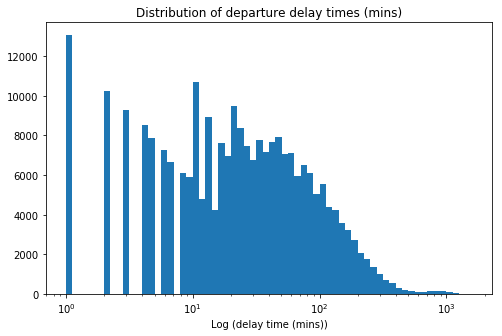

In [76]:
#plotting on a log scale instead
log_binsize = 0.05
bins = 10 ** np.arange(0, np.log10(df_master_unique['dep_delay'].max())+log_binsize, log_binsize)

histo(d=df_master_unique, x='dep_delay', b=bins)
plt.xscale('log')
plt.xlabel('Log (delay time (mins))')
plt.title('Distribution of departure delay times (mins)');

Looking at the histogram on a log scale you can see the peak for on time performance still remains, and it begins a smooth ramp down to the delayed times, indicating a large number of flights departing before the specified time. In addition there is another peak between 10 and 100 mins delay showing that, when flights depart after the time specified, it is usually within this time range. The smooth tapering off of the histogram at the longer delay end would indicate fewer and fewer flights departing later.<br>
<br>
The number of flights departing before time is interesting to note because, I have never noticed if my flight left the gate before time or not. Note, that in this case, departure means leaving the boarding gate!

Looking at arrivals.

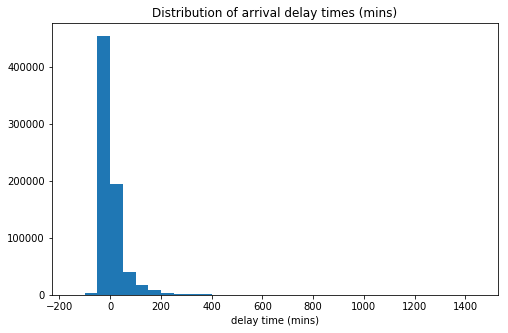

In [77]:
#start with a standard histogram
binsize = 50
bins = np.arange(-150, df_master_unique['arr_delay'].max()+binsize, binsize)

histo(d=df_master_unique, x='arr_delay', b=bins)
plt.xlabel('delay time (mins)')
plt.title('Distribution of arrival delay times (mins)');

This is looking the same as the departure delays histogram. Plotting this data on a log scale histogram:

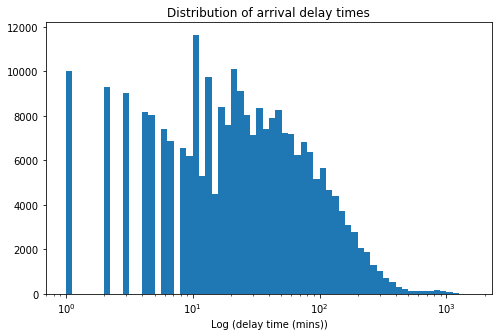

In [78]:
#plotting on a log scale instead
log_binsize = 0.05
bins = 10 ** np.arange(0, np.log10(df_master_unique['arr_delay'].max())+log_binsize, log_binsize)

histo(d=df_master_unique, x='arr_delay', b=bins)
plt.xscale('log')
plt.xlabel('Log (delay time (mins))')
plt.title('Distribution of arrival delay times');

The pattern of the arrivals delay histogram is very similar to that of departures. However, for early arrivals, the count seems a little smaller, and the closer the arrivals time approches (for early arrivals) the number of flights decreases more and more. There are two peaks in this histogram, one for the early flights and one for arrivals between 10 and 100 mins late. In the delay phase it looks one main peak tapering off with a fairly long tail indicating most flights have short to moderate delays, with very few having extremely long delays in arrivals.

One of the key points of my investigation is to determine the factors affecting the taxi time to and from the runway. Therefore let's look at the distribution of taxi times:

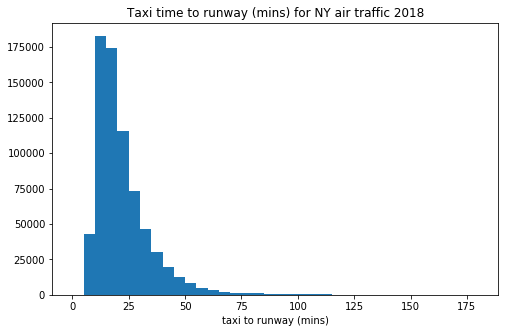

In [79]:
#taxi time to the runway (taxi_out)
#histogram to plot taxi out

binsize = 5
bins = np.arange(0, df_master_unique['taxi_out'].max()+binsize, binsize)

histo(d=df_master_unique, x='taxi_out', b=bins)
plt.xlabel('taxi to runway (mins)')
plt.title('Taxi time to runway (mins) for NY air traffic 2018');

We can see another similar pattern as that of departure/arrival delays, with the curve being right-skewed. Most of the taxi times fall in a short range, up to 25 minutes. However the long x-axis here would indicate some exceptionally high values in the data, some outliers. These could be removed.

Let's look at the taxi in times now:

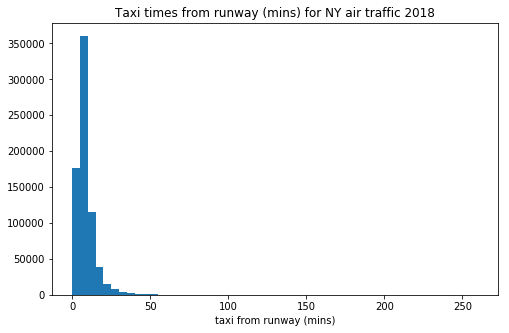

In [80]:
#taxi time from the runway (taxi_in)
#histogram to plot taxi in

binsize = 5
bins = np.arange(0, df_master_unique['taxi_in'].max()+binsize, binsize)

histo(d=df_master_unique, x='taxi_in', b=bins)
plt.xlabel('taxi from runway (mins)')
plt.title('Taxi times from runway (mins) for NY air traffic 2018');

Yet again the same pattern emerges, with the data being skewed to the right. This graph also suggests some outliers as almost all the data is to the left side of the x-axis. This would suggest some possible outliers in the data. It would be interesting to investigate this further, as generally flights arriving would not be expected to wait on the tarmac for such a long time without a gate being made available.

In [81]:
#investigate outliers in taxi_out

taxi_out_outliers = df_master_unique[df_master_unique['taxi_out'] > 125]
taxi_out_outliers

,actual_elapsed_time,air_time,arr_del15,arr_delay,arr_period,cancelled,day_of_month,day_of_week,delay_type,delay_type_mins,...,dep_period,dest,distance,diverted,fl_date,month,op_unique_carrier,origin,taxi_in,taxi_out
2199,199.0,56.0,1.0,339.0,Evening,0,5,Fri,carrier_delay,150.0,...,Afternoon,ROC,264,0,2018-05-01,Jan,B6,JFK,4.0,139.0
2296,285.0,147.0,1.0,285.0,Afternoon,0,5,Fri,carrier_delay,91.0,...,Morning,MCO,944,0,2018-05-01,Jan,B6,JFK,11.0,127.0
2306,201.0,59.0,1.0,232.0,Evening,0,5,Fri,carrier_delay,71.0,...,Afternoon,BUF,301,0,2018-05-01,Jan,B6,JFK,3.0,139.0
2355,189.0,46.0,1.0,161.0,Afternoon,0,6,Sat,carrier_delay,48.0,...,Morning,JFK,209,0,2018-06-01,Jan,B6,SYR,4.0,139.0
4032,186.0,41.0,1.0,126.0,Morning,0,30,Tue,carrier_delay,23.0,...,Morning,LGA,184,0,2018-01-30,Jan,B6,BOS,5.0,140.0
5086,235.0,80.0,1.0,106.0,Morning,0,30,Tue,carrier_delay,15.0,...,Morning,CLT,544,0,2018-01-30,Jan,EV,LGA,14.0,141.0
10897,501.0,344.0,1.0,220.0,Evening,0,5,Fri,carrier_delay,109.0,...,Afternoon,LAX,2475,0,2018-05-01,Jan,DL,JFK,9.0,148.0
15183,205.0,61.0,1.0,185.0,Afternoon,0,7,Wed,carrier_delay,86.0,...,Morning,LGA,431,0,2018-07-02,Feb,EV,RDU,13.0,131.0
23663,230.0,89.0,1.0,126.0,Afternoon,0,2,Fri,carrier_delay,41.0,...,Morning,CVG,585,0,2018-02-03,Mar,9E,LGA,4.0,137.0
24216,248.0,113.0,1.0,191.0,Morning,0,2,Fri,carrier_delay,105.0,...,Morning,ORD,740,0,2018-02-03,Mar,9E,JFK,9.0,126.0


In [82]:
taxi_out_outliers.sample(10)

,actual_elapsed_time,air_time,arr_del15,arr_delay,arr_period,cancelled,day_of_month,day_of_week,delay_type,delay_type_mins,...,dep_period,dest,distance,diverted,fl_date,month,op_unique_carrier,origin,taxi_in,taxi_out
320955,309.0,163.0,1.0,210.0,Evening,0,5,Fri,nas_delay,164.0,...,Afternoon,FLL,1069,0,2018-05-01,Jan,B6,JFK,5.0,141.0
398323,293.0,150.0,1.0,80.0,Evening,0,27,Fri,nas_delay,80.0,...,Afternoon,MIA,1096,0,2018-07-27,Jul,AA,LGA,8.0,135.0
436189,238.0,93.0,1.0,134.0,Evening,0,7,Fri,nas_delay,134.0,...,Evening,PBG,444,0,2018-07-09,Sep,OO,IAD,4.0,141.0
136493,315.0,172.0,1.0,179.0,Evening,0,15,Thu,carrier_delay,31.0,...,Afternoon,PBI,1035,0,2018-11-15,Nov,B6,LGA,4.0,139.0
373847,502.0,345.0,1.0,109.0,Evening,0,15,Tue,nas_delay,109.0,...,Afternoon,SFO,2586,0,2018-05-15,May,DL,JFK,8.0,149.0
386413,287.0,139.0,1.0,124.0,Morning,0,9,Sat,nas_delay,124.0,...,Morning,ORD,733,0,2018-09-06,Jun,AA,LGA,18.0,130.0
389408,262.0,111.0,1.0,135.0,Evening,0,28,Thu,nas_delay,126.0,...,Afternoon,GRR,618,0,2018-06-28,Jun,9E,LGA,5.0,146.0
419473,408.0,263.0,1.0,87.0,Afternoon,0,11,Sat,nas_delay,87.0,...,Morning,PHX,2153,0,2018-11-08,Aug,DL,JFK,5.0,140.0
160376,196.0,61.0,1.0,228.0,Evening,0,5,Fri,weather_delay,54.0,...,Afternoon,RIC,288,0,2018-05-01,Jan,9E,JFK,6.0,129.0
88431,283.0,143.0,1.0,138.0,Evening,0,22,Sun,carrier_delay,1.0,...,Evening,LGA,1076,0,2018-07-22,Jul,DL,FLL,8.0,132.0


Looking at a random sample of high-value taxi_out times, most of the data with high taxi times seems to exhibit nas_delay factors, which could indicate there were airspace issues preventing the aircraft from taking to the skies once they left the gate. However other factors may be in play here too, of course.

In [83]:
#investigate outliers in taxi_in

taxi_in_outliers = df_master_unique[df_master_unique['taxi_in'] > 55]
taxi_in_outliers

,actual_elapsed_time,air_time,arr_del15,arr_delay,arr_period,cancelled,day_of_month,day_of_week,delay_type,delay_type_mins,...,dep_period,dest,distance,diverted,fl_date,month,op_unique_carrier,origin,taxi_in,taxi_out
374,230.0,95.0,1.0,233.0,Evening,0,5,Fri,carrier_delay,21.0,...,Afternoon,JFK,589,0,2018-05-01,Jan,9E,CVG,114.0,21.0
388,211.0,79.0,1.0,246.0,Afternoon,0,5,Fri,carrier_delay,155.0,...,Morning,JFK,509,0,2018-05-01,Jan,9E,DTW,89.0,43.0
714,243.0,139.0,1.0,177.0,Evening,0,15,Mon,carrier_delay,9.0,...,Evening,MKE,738,0,2018-01-15,Jan,9E,LGA,73.0,31.0
805,133.0,54.0,1.0,90.0,Evening,0,6,Sat,carrier_delay,61.0,...,Evening,JFK,288,0,2018-06-01,Jan,9E,RIC,63.0,16.0
957,143.0,44.0,1.0,249.0,Afternoon,0,8,Mon,carrier_delay,6.0,...,Afternoon,DCA,213,0,2018-08-01,Jan,9E,JFK,61.0,38.0
1096,228.0,124.0,1.0,194.0,Afternoon,0,5,Fri,carrier_delay,105.0,...,Morning,JFK,740,0,2018-05-01,Jan,9E,ORD,68.0,36.0
1127,159.0,44.0,1.0,89.0,Afternoon,0,8,Mon,carrier_delay,25.0,...,Afternoon,DCA,213,0,2018-08-01,Jan,9E,JFK,66.0,49.0
1170,262.0,120.0,1.0,93.0,Afternoon,0,12,Fri,carrier_delay,5.0,...,Morning,ORD,740,0,2018-12-01,Jan,9E,JFK,56.0,86.0
1206,195.0,107.0,1.0,65.0,Evening,0,5,Fri,carrier_delay,12.0,...,Afternoon,JFK,765,0,2018-05-01,Jan,9E,BNA,74.0,14.0
1667,208.0,119.0,1.0,132.0,Evening,0,1,Mon,carrier_delay,74.0,...,Afternoon,ORD,740,0,2018-01-01,Jan,B6,JFK,76.0,13.0


In [84]:
taxi_in_outliers.sample(10)

,actual_elapsed_time,air_time,arr_del15,arr_delay,arr_period,cancelled,day_of_month,day_of_week,delay_type,delay_type_mins,...,dep_period,dest,distance,diverted,fl_date,month,op_unique_carrier,origin,taxi_in,taxi_out
98446,169.0,88.0,1.0,68.0,Evening,0,7,Tue,carrier_delay,3.0,...,Evening,CLT,546,0,2018-07-08,Aug,AA,BUF,70.0,11.0
144042,312.0,87.0,1.0,442.0,Night,0,15,Thu,carrier_delay,24.0,...,Evening,JFK,718,0,2018-11-15,Nov,DL,SAV,211.0,14.0
17289,409.0,331.0,0.0,14.0,Night,0,14,Sun,NaN,NaN,...,Evening,LAX,2475,0,2018-01-14,Jan,B6,JFK,59.0,19.0
431632,165.0,84.0,1.0,31.0,Evening,0,8,Sat,nas_delay,31.0,...,Afternoon,JFK,636,0,2018-08-09,Sep,DL,CHS,67.0,14.0
10463,428.0,326.0,1.0,25.0,Night,0,1,Mon,carrier_delay,1.0,...,Evening,LAX,2475,0,2018-01-01,Jan,AA,JFK,76.0,26.0
386315,428.0,321.0,1.0,21.0,Night,0,6,Wed,nas_delay,21.0,...,Evening,LAX,2475,0,2018-06-06,Jun,AA,JFK,63.0,44.0
369836,220.0,133.0,1.0,60.0,Afternoon,0,12,Sat,nas_delay,60.0,...,Afternoon,ORD,733,0,2018-12-05,May,OO,LGA,65.0,22.0
63547,392.0,313.0,1.0,46.0,Evening,0,18,Mon,carrier_delay,8.0,...,Afternoon,JFK,2475,0,2018-06-18,Jun,DL,LAX,60.0,19.0
428048,177.0,83.0,1.0,48.0,Evening,0,27,Thu,nas_delay,48.0,...,Afternoon,JFK,483,0,2018-09-27,Sep,YX,CMH,70.0,24.0
434162,396.0,305.0,0.0,12.0,Morning,0,21,Sat,NaN,NaN,...,Morning,LAX,2475,0,2018-07-21,Jul,AS,JFK,64.0,27.0


The same goes for taxi_in times. The trend seems to show that high taxi_in times tend to have nas_delay factors affecting them. It could explain the unusual circumstance of a flight landing and having nowhere to park. Other factors could be a cause too, however.

Looking at the taxi times on a log scale shows a clearer pattern:

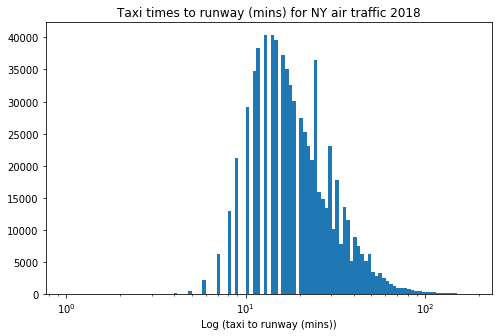

In [85]:
#plotting taxi_out on a log scale instead
log_binsize = 0.02
bins = 10 ** np.arange(0, np.log10(df_master_unique['taxi_out'].max())+log_binsize, log_binsize)

histo(d=df_master_unique, x='taxi_out', b=bins)
plt.xscale('log')
plt.xlabel('Log (taxi to runway (mins))')
plt.title('Taxi times to runway (mins) for NY air traffic 2018');

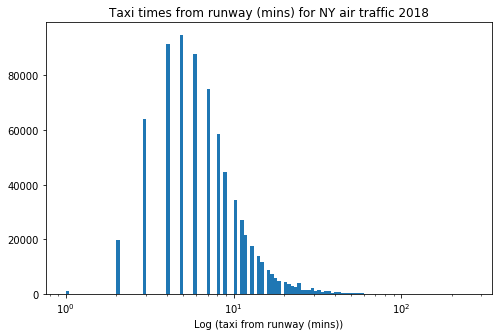

In [86]:
#plotting taxi in on a log scale instead
log_binsize = 0.02
bins = 10 ** np.arange(0, np.log10(df_master_unique['taxi_in'].max())+log_binsize, log_binsize)

histo(d=df_master_unique, x='taxi_in', b=bins)
plt.xscale('log')
plt.xlabel('Log (taxi from runway (mins))')
plt.title('Taxi times from runway (mins) for NY air traffic 2018');

Most taxi times to the runway were between 10 and 20 minutes, whereas from the runway the taxi times were mostly below 10 minutes. I am most interested in the taxi times to the runway as this is when I would be most excited to be sitting on the tarmac.

Finally, look at the distribution of flight times for NY air traffic in minutes:

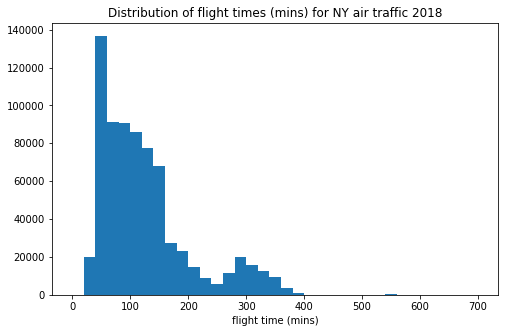

In [87]:
#histogram to plot flight times

binsize = 20
bins = np.arange(0, df_master_unique['air_time'].max()+binsize, binsize)

histo(d=df_master_unique, x='air_time', b=bins)
plt.xlabel('flight time (mins)')
plt.title('Distribution of flight times (mins) for NY air traffic 2018');

The distribution of flight time is bimodal, showing there are two sets of peaks in the dataset for flight time. However, the largest peak is at around 50 mins, indicating most domestic flights in and out of NY were roughly one hour long.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The taxi_in and taxi_out times showed a right-skewed distribution when plotted on absolute values, with most taxi-out times within 25 mins and most taxi-in times within 10 mins. Plotting these distributions on a log scale showed a unimodal distribution of data for taxi-in. However the taxi-out plot did show a single peak at around 25 minutes, indicating a large presence of flights with taxi time of around this long.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> One of the standout features was the high range in taxi times, both in and out. However on further investigation of randomly sampled data, it was not possible to determine that these were incorrectly recorded data points as they exhibited nas_delay reasons which may account for the time taken. For a fuller investigation these points have been left in. 

> Not all flights contained information on the types of delays they encountered, as a result many flights were left with null valued delay types. The delay type data had to be inpivoted previously for the sake of keeping the data tidy, but this resulted in duplicated flights where certain journeys encountered more than one delay type. When analysing the flight count by airline/airport, the duplicate journeys were filtered out to get an accurate representation of the data.

> Taxi times also contained null values for some flights. This could be down to flight cancellations. Therefore they were filtered out of the dataset before taxi times were analysed.

> Flights with delay times (mins) greater than 24 hours were also filtered out of the dataset to keep the data consistent with delays no more than one day, which generally should mean a flight would depart with the same aircraft and the same flight crew, minimising other outcomes such as passengers being placed on alternative flights, in order to look at this dataset from the perspective of the passenger.

> It was interesting to note that from the airports, LGA had the most domestic air traffic in 2018, rather than JFK. This could be interesting to look at further.

## Bivariate Exploration


Let's begin by comparing the each field of data in pair-wise correlations:

In [88]:
#create lists to order the bivariate plots
numeric_vars = ['air_time','arr_delay','dep_delay','taxi_in','taxi_out','distance']
category_vars = ['day_of_week','month','arr_period','dep_period','op_unique_carrier','delay_type','origin','dep_period']

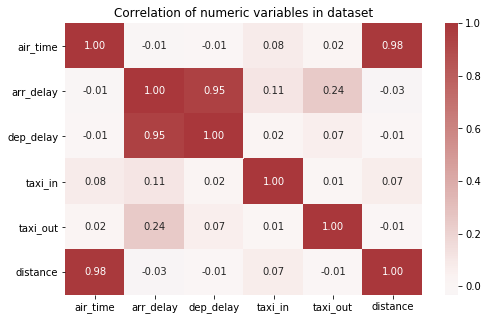

In [89]:
# correlation plot
plt.figure(figsize = [8, 5])
sb.heatmap(df_master_unique[numeric_vars].corr(), annot = True, fmt = '.2f',
           cmap = 'vlag', center = 0)
plt.title('Correlation of numeric variables in dataset');

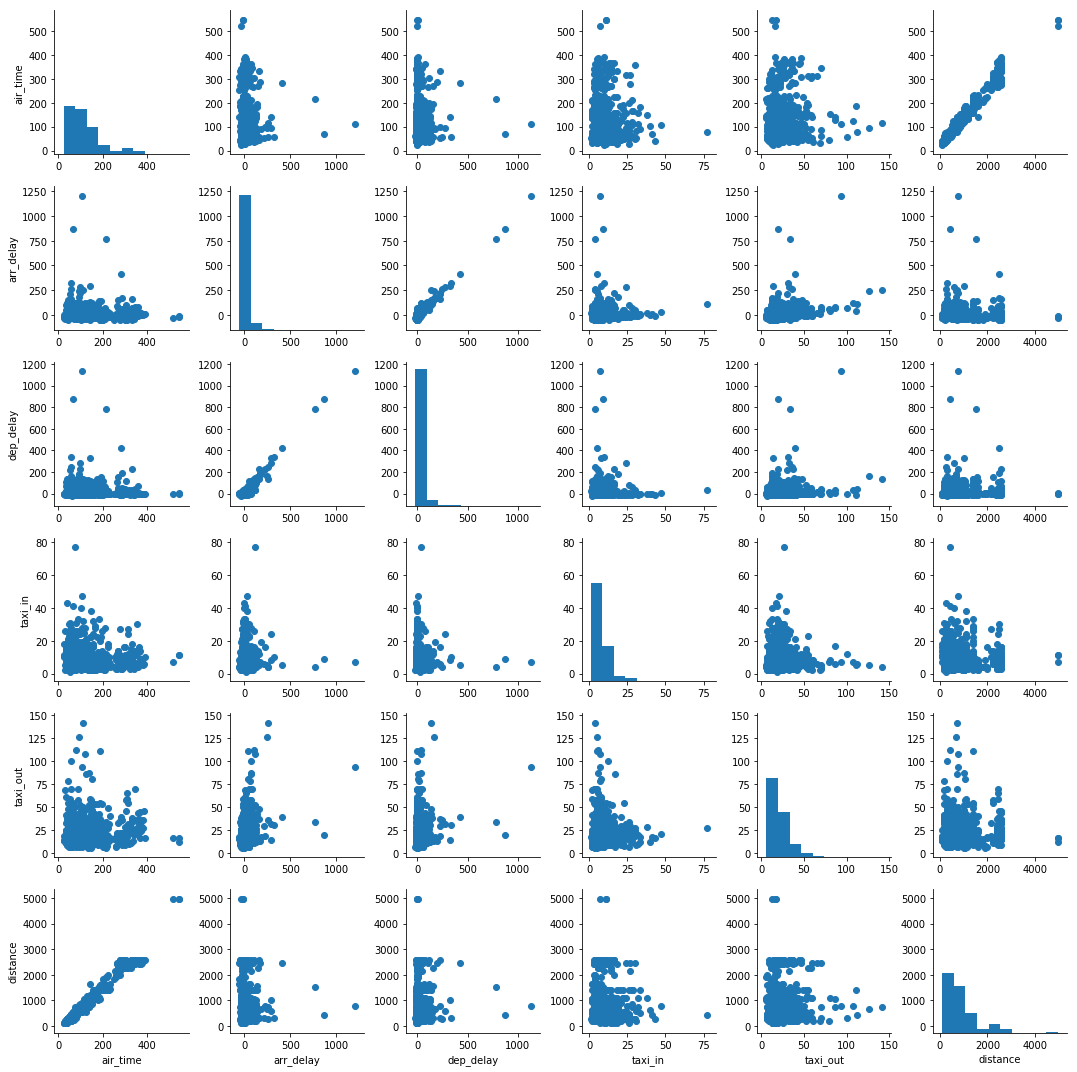

In [90]:
# plot matrix: sampling 1000 flights
sample = df_master_unique.sample(1000)

g = sb.PairGrid(data = sample, vars = numeric_vars)
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter);

Interestingly, there seems to be very little correlation between taxi times and any of the numeric variables in the PairGrid plot above. This is further confirmed by the heatmap showing the correlations of each numeric variable. The main correlations lie in the distance and air time, and departure delay and arrival delay. These would make sense as a flight travelling further should be airborn longer, and flights affected by a departure delay will most likely be delayed on arrival too.<br>
<br>
The plots above do not account for the delay reasons.

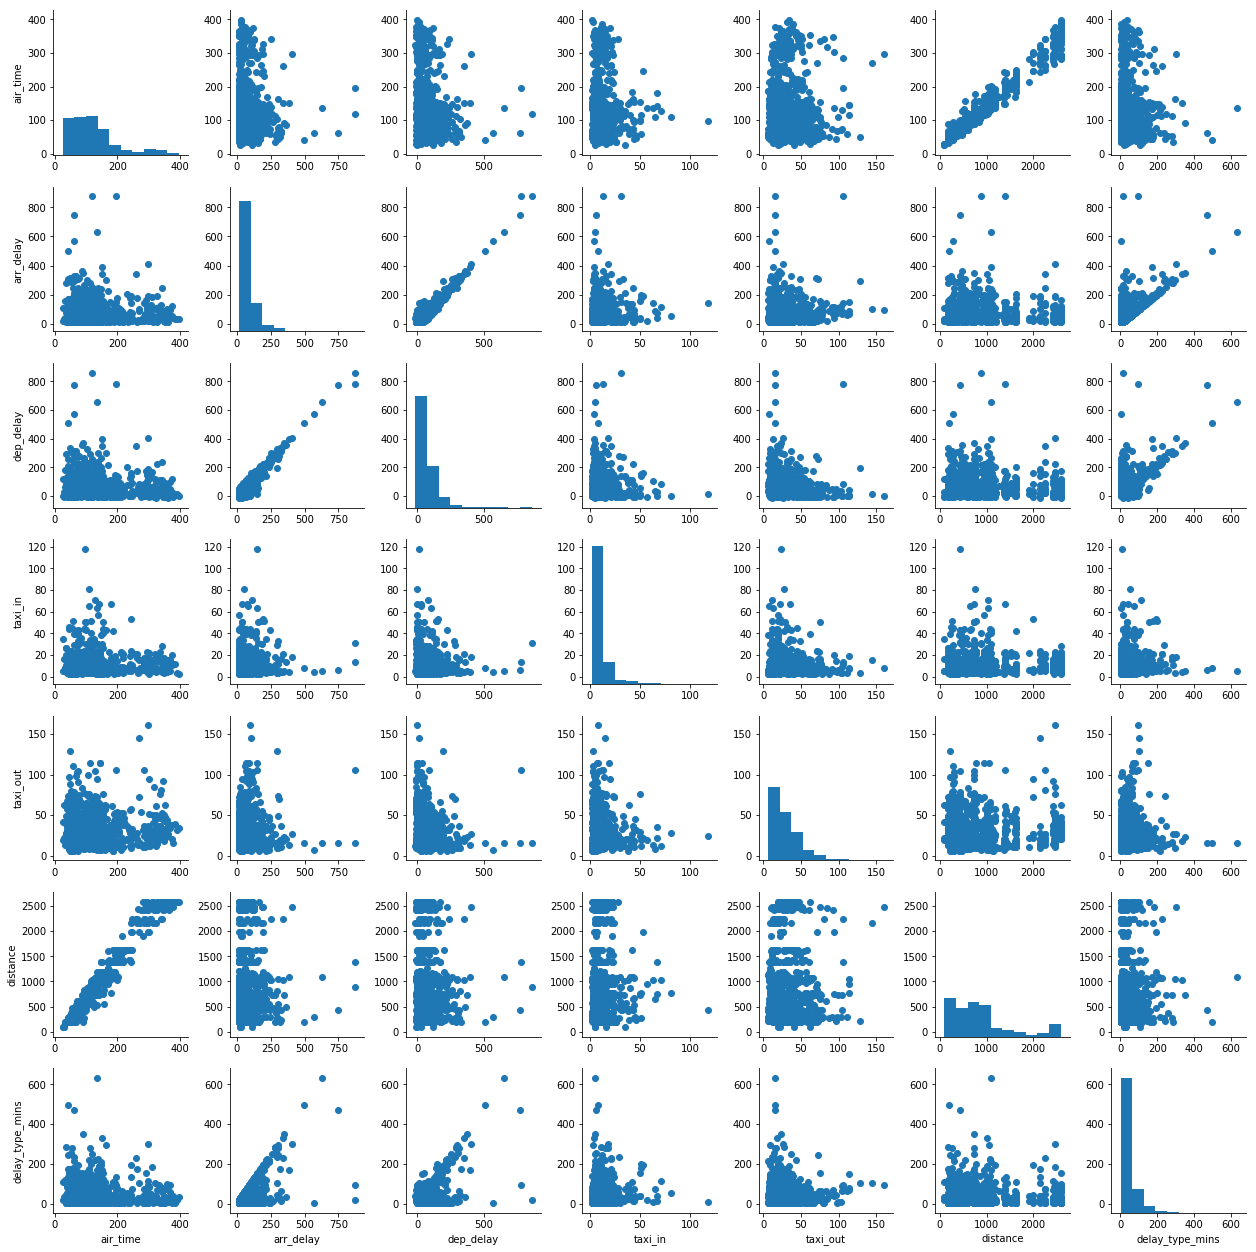

In [91]:
#looking at the delay type mins as a factor
#filter the dataset for null values in delay type mins

delay_reasons = df_master[df_master['delay_type'].notnull()]

#take a sample of the filtered data
sample1 = delay_reasons.sample(1000)

#set new numeric variables
numeric_vars1 = ['air_time','arr_delay','dep_delay','taxi_in','taxi_out','distance','delay_type_mins']

#plot marix for this data

g = sb.PairGrid(data = sample1, vars = numeric_vars1)
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter);

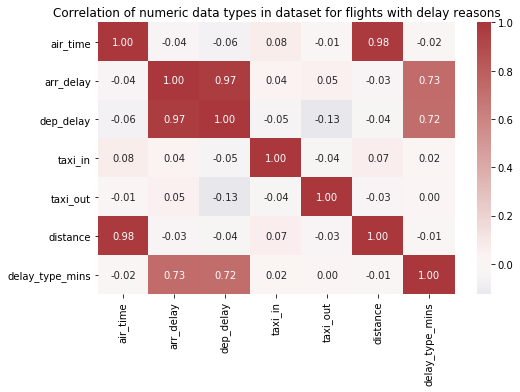

In [92]:
# correlation plot
plt.figure(figsize = [8, 5])
sb.heatmap(delay_reasons[numeric_vars1].corr(), annot = True, fmt = '.2f',
           cmap = 'vlag', center = 0)
plt.title('Correlation of numeric data types in dataset for flights with delay reasons');

Looking at the PairGrid plot and heatmap for the multiple variables including the delay type mins, it is still easy to see there is no strong correlation with other numeric variables, except for the arrival and departure delays. This could be explained by various types of delay categories being a factor in creating a delay in the flight's departure and subsequent arrival into its destination.

Perhaps the categorical data will give more insight into any patterns in the data. Let's look at the relationship between categories and taxi/delay times:

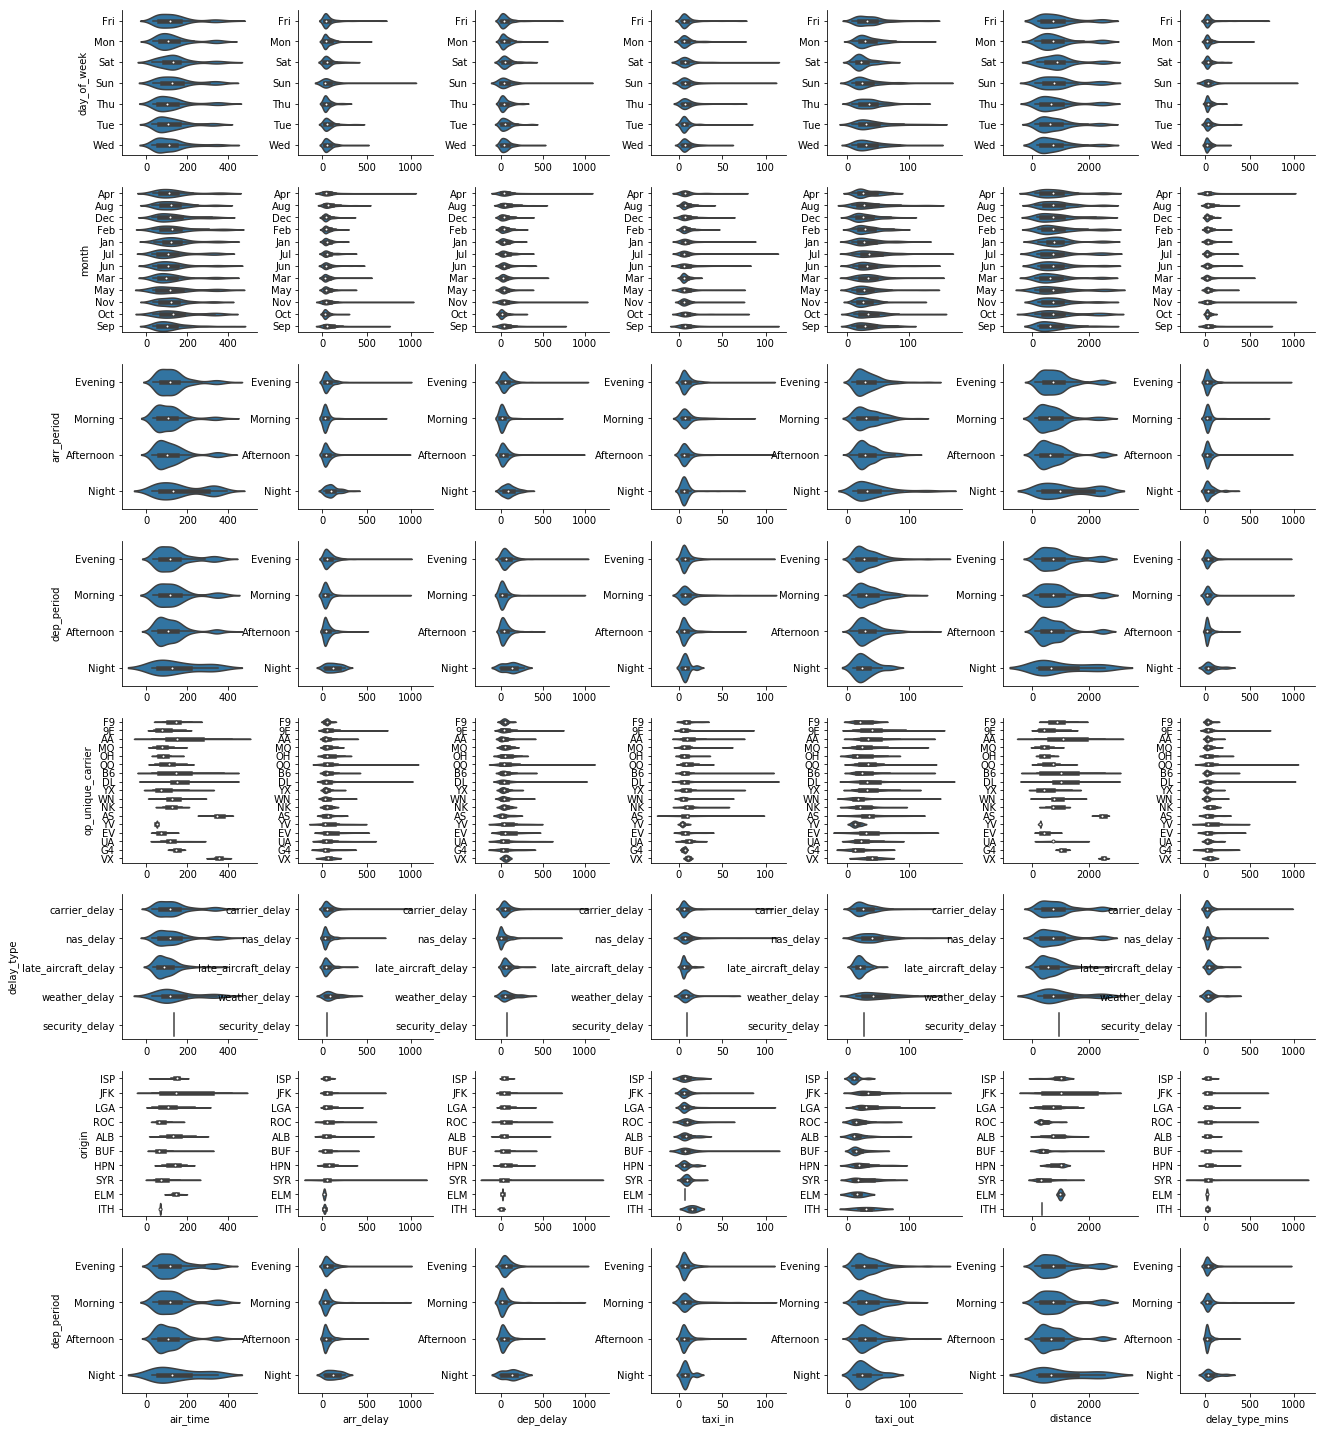

In [93]:
#looking at the relationship between categories and delays and taxi times

sample2 = ny_dep[ny_dep['delay_type'].notnull()].sample(1000)

g = sb.PairGrid(data = sample2, x_vars=numeric_vars1, y_vars=category_vars)
g.map(sb.violinplot);

Looking at the categorical data versus numeric data, there are some conclusions that can be made. Mornings have longer median taxi_out times but more flights have longer taxi_outs at night than they do during the morning. In addition, the dep_delay also seems to have more flights with longer delays at night, with the median dep_delay highest at night. However the morning experienced a few very long delays, indicated by the long stem of the violin.<br>
<br>
While the median delay time seems to be fairly consistent across each day of the week, it seems Sundays and Tuesdays had some rather longer delays in 2018. Sundays also saw some very long taxi_out times, but overall it had a much lower median taxi_out time than the other days.<br>
<br>
Most late aircraft and security delays don't result in long taxi out times, but nas delays and weather delays saw more flights taking longer to taxi to the runway.<br>
<br>
Security delays did not really cause any long delays last year, the same with late aircraft delays, but weather delays saw more significant numbers of departure delays along a wider time range. Nas delays were displayed the lowest median departure delay. <br>
<br>
Overall it seems like categorical data could lead to more conclusions on possible factors behind taxi times and delays.

To drill into this data, let's find the months in which we see the highest levels of each delay:

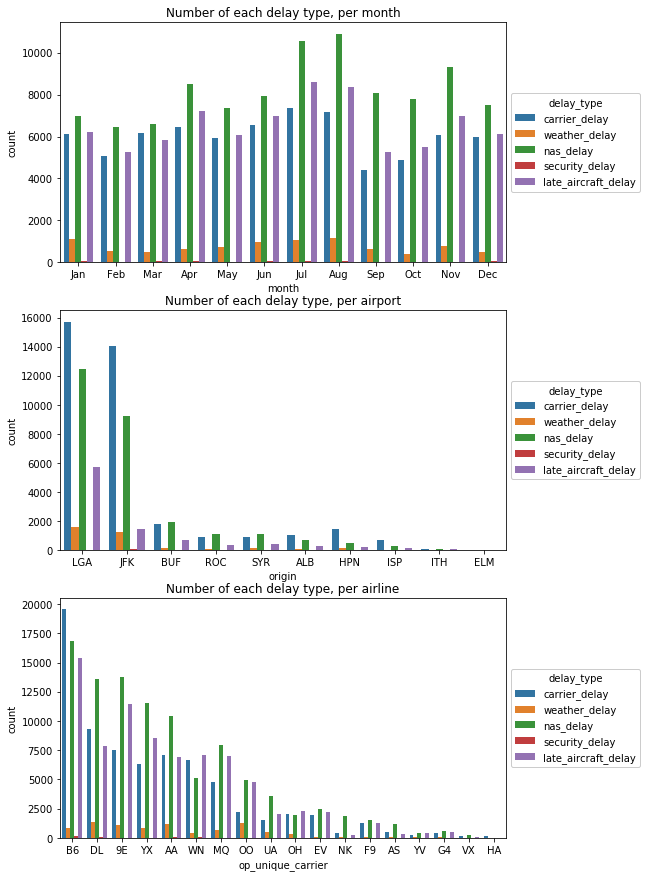

In [94]:
#plotting clustered bar chart
plt.figure(figsize=[8,15])

#plot effect of month of year on the number of delays of each type
plt.subplot(3,1,1)
ax1 = sb.countplot(data = df_master, x = 'month', hue = 'delay_type', order = months)
ax1.legend(bbox_to_anchor=(1, 0.5), loc = 6, ncol = 1, framealpha = 1, title = 'delay_type')
ax1.set_title('Number of each delay type, per month')

#plot the effect of departure airport on the number of delays of each type
plt.subplot(3,1,2)
#set the order for plotting
airports_dep_delay = ny_dep['origin'].value_counts().index
ax2 = sb.countplot(data = ny_dep, x = 'origin', hue = 'delay_type', order = airports_dep_delay)
ax2.legend(bbox_to_anchor=(1, 0.5), loc = 6, ncol = 1, framealpha = 1, title = 'delay_type')
ax2.set_title('Number of each delay type, per airport')

#plot the effect of airline on the number of delays of each type
plt.subplot(3,1,3)
airline_del = df_master['op_unique_carrier'].value_counts().index
ax3 = sb.countplot(data = df_master, x = 'op_unique_carrier', hue = 'delay_type', order = airline_del)
ax3.legend(bbox_to_anchor=(1, 0.5), loc = 6, ncol = 1, framealpha = 1, title = 'delay_type')
ax3.set_title('Number of each delay type, per airline');

Looking at the countplots above, July and August had the most delays in the year, mainly made up of NAS and late aircraft delays. These were more focused on the two larger airports, LaGuardia (LGA) and JFK. JetBlue and Delta were the biggest culprits behind the number of delays in 2018.<br>
<br>
Weather delays were very small in number compared to those delays, but they peaked in the summer months and January. This could be explained by hurricane season in the summer months in places such as Florida causing departure delays. In January, the delays cuold be due to cold weather/snow.

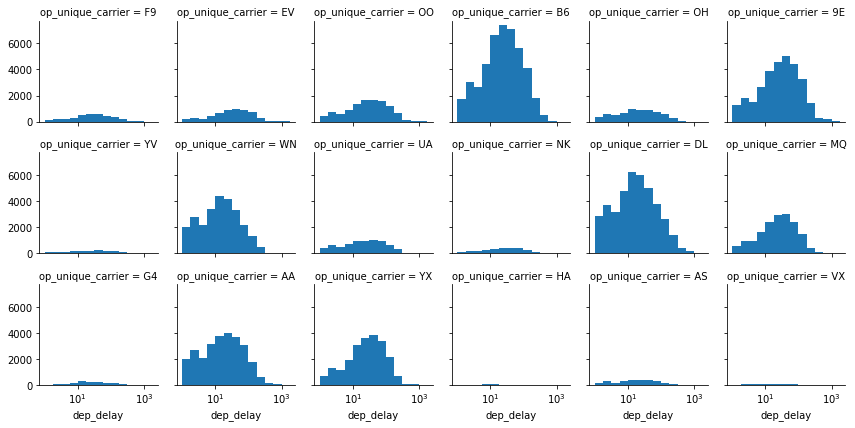

In [95]:
#plot facet grid of airline carriers versus departure delays

group_means = df_master_unique.groupby(['op_unique_carrier']).mean()
group_orders = group_means.sort_values(['dep_delay'], ascending = False).index

bins1 = 10 ** np.arange(0, np.log10(df_master_unique['dep_delay'].max())+0.25, 0.25)

g = sb.FacetGrid(data = df_master_unique, col = 'op_unique_carrier', col_wrap = 6, size = 2,
                 col_order = group_orders)
g.map(plt.hist, 'dep_delay', bins = bins1)
plt.xscale('log');

JetBlue had largest number of delays, but as the histograms above show, those delays were usually moderate in time. Delta#s distibuton is left-skewed too, indicating most delays were moderate in length.

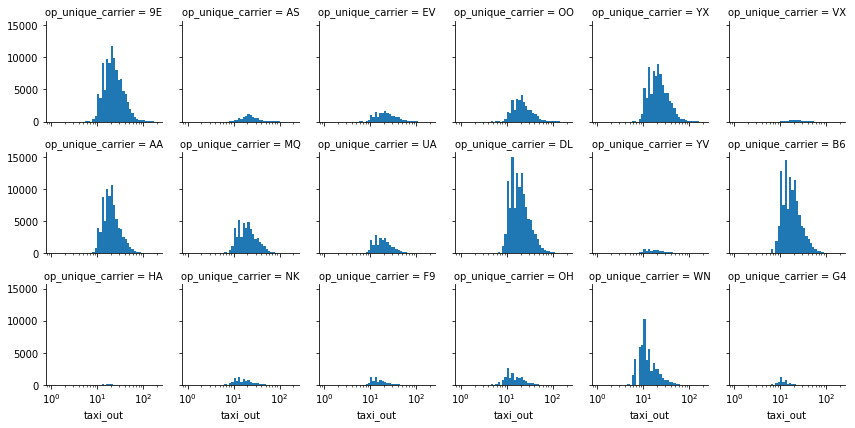

In [96]:
#plot facet grid of airline carriers versus taxi times to runway

group_means = df_master_unique.groupby(['op_unique_carrier']).mean()
group_orders = group_means.sort_values(['taxi_out'], ascending = False).index

bins2 = 10 ** np.arange(0, np.log10(df_master_unique['taxi_out'].max())+0.05, 0.05)

g = sb.FacetGrid(data = df_master_unique, col = 'op_unique_carrier', col_wrap = 6, size = 2,
                 col_order = group_orders)
g.map(plt.hist, 'taxi_out', bins = bins2)
plt.xscale('log');

Delta (DL) and JetBlue (B6) had very similar distributions for taxi times, matched also by Endeavour (9E) but to a smaller scale. Looking at the histograms above it seems most taxi times are roughly the same in length, with distributions being right skewed, indicating most of the taxi times were shorter in length rather than longer.

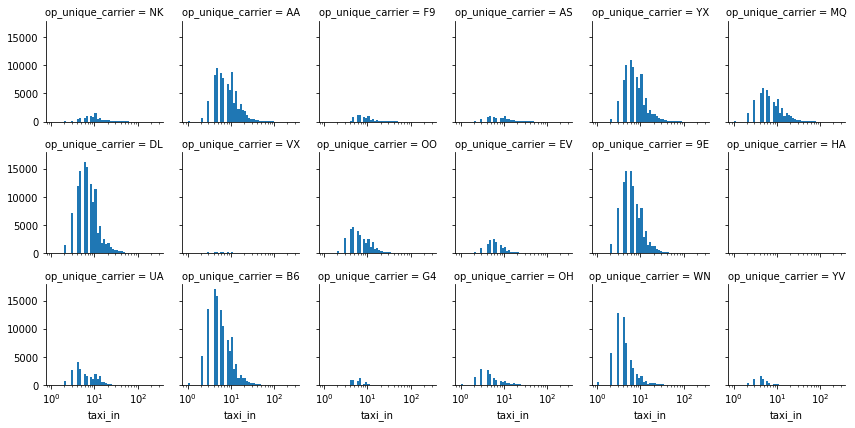

In [97]:
#plot facet grid of airline carriers versus taxi times from runway

group_means = df_master_unique.groupby(['op_unique_carrier']).mean()
group_orders = group_means.sort_values(['taxi_in'], ascending = False).index

bins2 = 10 ** np.arange(0, np.log10(df_master_unique['taxi_in'].max())+0.05, 0.05)

g = sb.FacetGrid(data = df_master_unique, col = 'op_unique_carrier', col_wrap = 6, size = 2,
                 col_order = group_orders)
g.map(plt.hist, 'taxi_in', bins = bins2)
plt.xscale('log');

From the runway back to the gate, almost all taxi times were within a reasonable time period. The distributions are unimodal too.

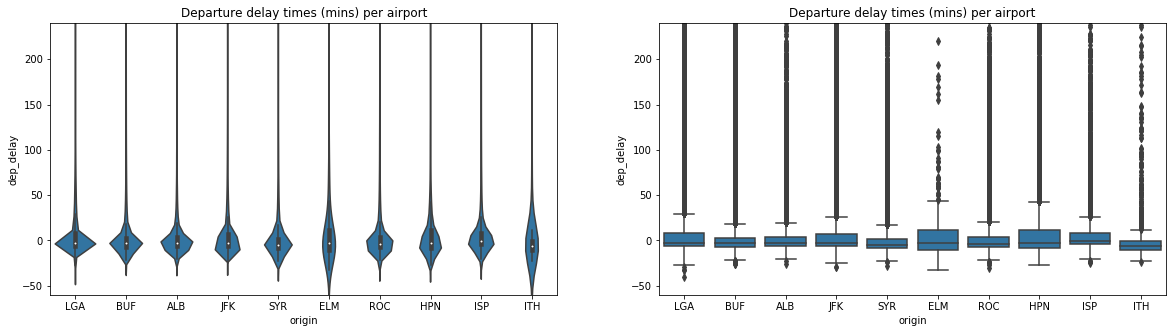

In [98]:
#which airports have the longest departure delays

plt.figure(figsize = [20, 5])

# left plot: violin plot
plt.subplot(1, 2, 1)
ax1 = sb.violinplot(data = ny_dep, x = 'origin', y = 'dep_delay', color = color)
plt.ylim(-60,240) # set ylim to a 5 hour window to focus in on the majority of the data and view the trends
plt.title('Departure delay times (mins) per airport')

# right plot: box plot
plt.subplot(1, 2, 2)
sb.boxplot(data = ny_dep, x = 'origin', y = 'dep_delay', color = color)
plt.title('Departure delay times (mins) per airport')

# set y-axis limits to be same as left plot
plt.ylim(ax1.get_ylim()); 

Looking at the violinplot and boxplot for departure delays by airport, it can be said most airports seemed to perform roughly the same. It did not make much of a difference where you travelled from, although ELM and ITH showed some of the earliest departure times out of the dataset too, compared to their scheduled departure time.<br>
<br>
There were clearly many outliers in the dataset, but these could not be ignored simply because they did not fit into the pattern of regular data. These outliers could be the result of specific delay types, which ultimately move the mean departure delay times.<br>
<br>
The median departure delays were around 0, and surprisingly for large airports, LGA and JFK displayed a small interquartile range.

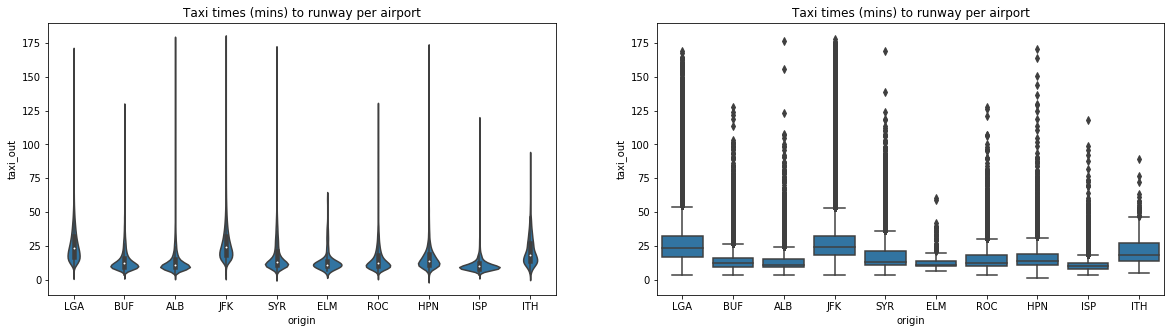

In [99]:
#which airports have the longest taxi out times

plt.figure(figsize = [20, 5])

# left plot: violin plot
plt.subplot(1, 2, 1)
ax1 = sb.violinplot(data = ny_dep, x = 'origin', y = 'taxi_out', color = color)
plt.title('Taxi times (mins) to runway per airport')

# right plot: box plot
plt.subplot(1, 2, 2)
sb.boxplot(data = ny_dep, x = 'origin', y = 'taxi_out', color = color)
plt.title('Taxi times (mins) to runway per airport')

# set y-axis limits to be same as left plot
plt.ylim(ax1.get_ylim()); 

Looking at the above plots, taxi times were limited to a value of around 175 minutes at the longest, these values being outliers. However, here LGA and JFK displayed the largest interquartile ranges in the taxi times. This could be due to the airports being very busy with more air traffic compared to the rest. Both their median times were around 25 mins with most other airports showing lower median times.<br>
<br>
The violinplot shows though, that most of the taxi times at LGA and JFK were still at the lower end of times.

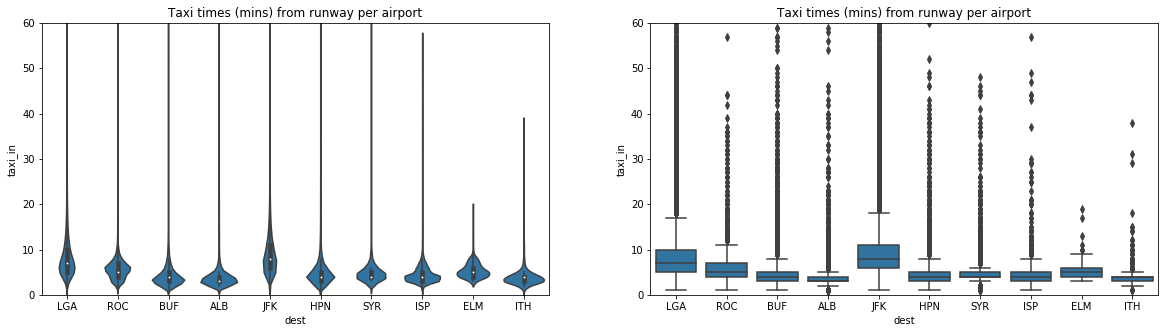

In [100]:
#which airports have the longest taxi in times

plt.figure(figsize = [20, 5])

# left plot: violin plot
plt.subplot(1, 2, 1)
ax1 = sb.violinplot(data = ny_arr, x = 'dest', y = 'taxi_in', color = color)
plt.ylim(0,60) # set ylim to a 3 hour window to focus in on the majority of the data and view the trends
plt.title('Taxi times (mins) from runway per airport')

# right plot: box plot
plt.subplot(1, 2, 2)
sb.boxplot(data = ny_arr, x = 'dest', y = 'taxi_in', color = color)
plt.title('Taxi times (mins) from runway per airport')

# set y-axis limits to be same as left plot
plt.ylim(ax1.get_ylim()); 

Again, JFK and LGA displayed the largest interquartile ranges in taxi times in.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> There was no real correlation between the numerical data in the dataset. However the two larger airports incurred larger numbers of delays compared to the rest of the airports. Also the months of July and August displayed this trend too, as did JetBlue and Delta from the airlines. 

> Taxi times to the runway were distributed in the a very similar pattern for each airline, with more flights around the 10-30 minutes mark. On a log scale, the distributions were unimodal. For airports, JFK and LGA had the highest median times, so this would indicate an area of focus if I want to maximist my plane viewing time from the tarmac.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> For the most part there was no correlation between any numerical data. However, as expected, as the journeys got longer in distance, the flight times did too. This was the only other strongly correlated data.

## Multivariate Exploration


Now that I know the larger airports are prone to higher numbers of delays, and Delta and JetBlue are too, I want to look at how they compare with departure delay times.<br>
<br>
I also want to see how the airports compare in taxi times to the runway at different times of the year as well as per airline, to see if there is a pattern with a combination of these variables. To start, let's look at the departure delays per month, per airline for the top 6 most active airlines.

In [101]:
#create list to order countplots
top_airlines = ['DL','B6','9E','YX','AA','WN']

#find the mean departure delay time per carrier, per month
means = ny_dep.groupby(['op_unique_carrier','month'], as_index=False).mean()

#filter for main airlines
means = means[means['op_unique_carrier'].isin(top_airlines)]

In [102]:
#define function to plot multivariate barplot

def m_barplot(y,l,t):
    plt.figure(figsize=[24,5])
    ax = sb.barplot(data = means, x = 'month', y = y, hue = 'op_unique_carrier', order=months, hue_order=top_airlines, palette='colorblind')
    ax.legend(bbox_to_anchor=(1, 0.5), loc = 6, ncol = 1, framealpha = 1, title = 'airline', prop={'size': 15})
    plt.xlabel('month', fontsize=15)
    plt.ylabel(l, fontsize=15)
    plt.title(t);

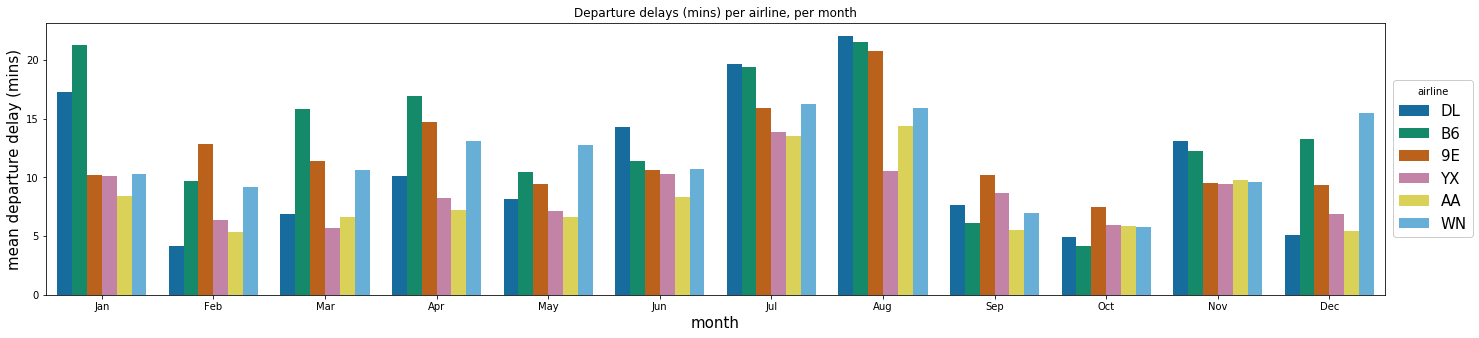

In [103]:
m_barplot(y='dep_delay', l='mean departure delay (mins)', t='Departure delays (mins) per airline, per month');

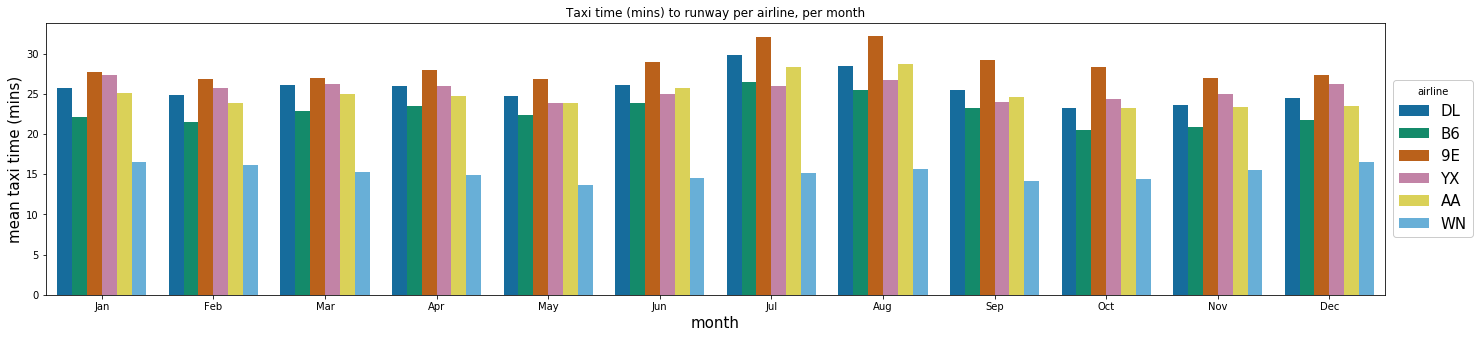

In [104]:
m_barplot(y='taxi_out', l='mean taxi time (mins)', t='Taxi time (mins) to runway per airline, per month');

Looking at the barplots above, the departure delays varied quite significantly between the months. July and August had the highest for all the airlines, which could be explained by the higher counts of delay type previously noted. However January also caused some long delays for Delta and JetBlue. This could potentially line up with the higher number of weather delays encountered in those months.<br>
<br>
The taxi times to the runway were also slightly higher in July and August, but were more consistent throughout the year. Westjet had significantly lower taxi times. This could be down to many factors, for example, Westjet boarding gates being much closer to the runways than other airlines.

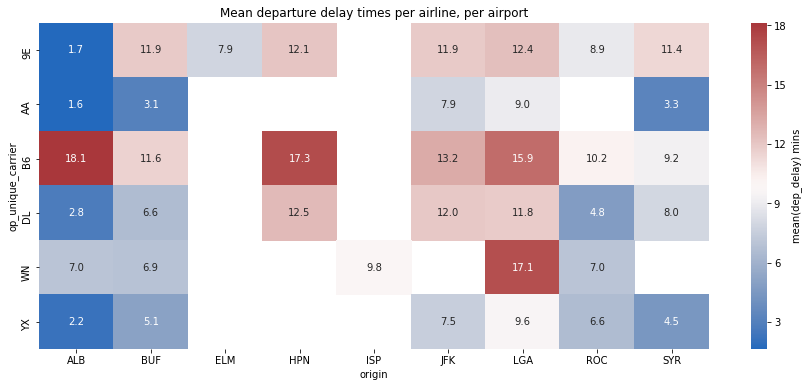

In [105]:
#heatmap to show the mean departure delays per month, per airline for the top 6 most active airlines

cat_means = ny_dep.groupby(['origin','op_unique_carrier'], as_index=False).mean()
cat_means = cat_means[cat_means['op_unique_carrier'].isin(top_airlines)]
cat_means1 = cat_means.pivot(index = 'op_unique_carrier', columns = 'origin',
                            values = 'dep_delay')

plt.figure(figsize=[15,6])
sb.heatmap(cat_means1, annot = True, fmt = '.1f',
           cbar_kws = {'label' : 'mean(dep_delay) mins'}, cmap='vlag')
plt.title('Mean departure delay times per airline, per airport');

Departure delay times were highest for JetBlue across each airport except SYR. It was more pronounced at ALB, HPN, JFK and LGA. Perhaps avoid flying JetBlue to avoid longer departure delays.<br>
<br>
On the other hand, Republic Airways and American were more punctual.

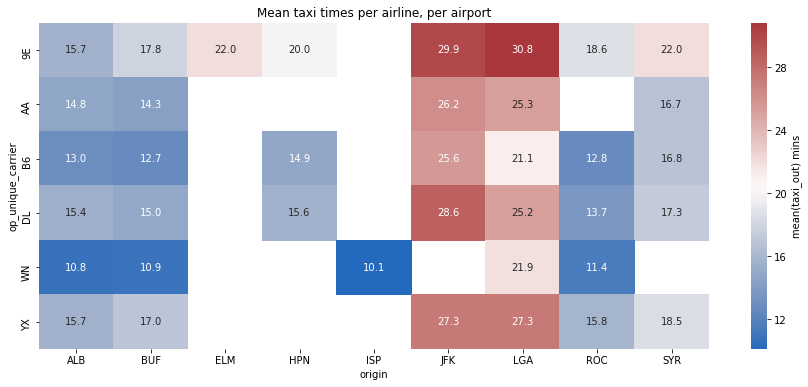

In [106]:
#heatmap to show the mean taxi out times per month, per airline for the top 6 most active airlines
cat_means2 = cat_means.pivot(index = 'op_unique_carrier', columns = 'origin',
                            values = 'taxi_out')

plt.figure(figsize=[15,6])
sb.heatmap(cat_means2, annot = True, fmt = '.1f',
           cbar_kws = {'label' : 'mean(taxi_out) mins'}, cmap='vlag')
plt.title('Mean taxi times per airline, per airport');

The heatmap above shows that the mean taxi times are highest for LGA and JFK, regardless of which airline you fly. From my standpoint, I'd want to fly from one of those!

In [107]:
#filter the ny_dep for the top six airlines
top_airlines_data = ny_dep[ny_dep['op_unique_carrier'].isin(top_airlines)]

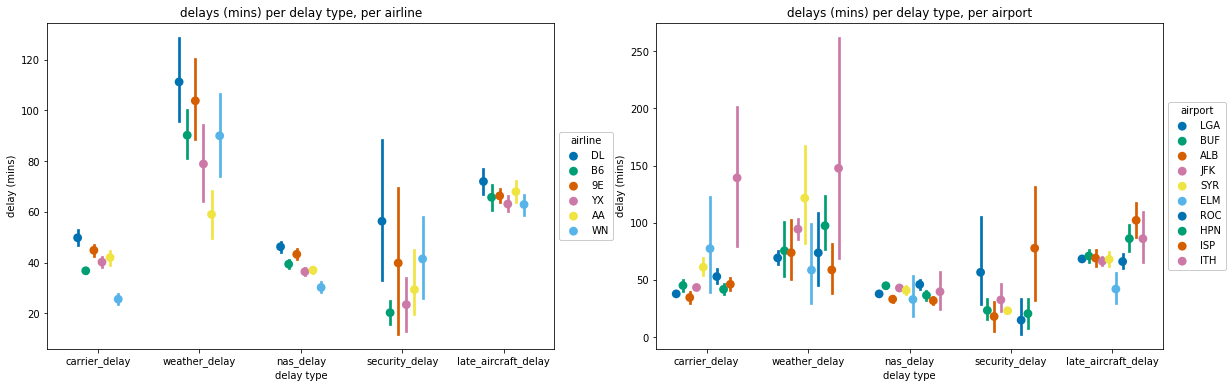

In [108]:
#plot the mean delay in mins, per delay type, per airline and airport
fig, ax = plt.subplots(ncols = 2, figsize = [20,6])

sb.pointplot(data = top_airlines_data, x = 'delay_type', y = 'delay_type_mins', hue = 'op_unique_carrier',
           palette = 'colorblind', linestyles = '', dodge = 0.4, ax=ax[0], hue_order = top_airlines)
ax[0].set_title('delays (mins) per delay type, per airline')
ax[0].set_yticklabels([],minor = True)
ax[0].set_xlabel('delay type')
ax[0].set_ylabel('delay (mins)')
ax[0].legend(bbox_to_anchor=(1, 0.5), loc = 6, ncol = 1, framealpha = 1, title = 'airline')

sb.pointplot(data = ny_dep, x = 'delay_type', y = 'delay_type_mins', hue = 'origin',
           palette = 'colorblind', linestyles = '', dodge = 0.6, ax=ax[1])
ax[1].set_title('delays (mins) per delay type, per airport')
ax[1].set_yticklabels([],minor = True)
ax[1].set_xlabel('delay type')
ax[1].set_ylabel('delay (mins)')
ax[1].legend(bbox_to_anchor=(1, 0.5), loc = 6, ncol = 1, framealpha = 1, title = 'airport');

The pointplots above show that weather delays seems to cause some of the longest delays, both per airline and per airport. JetBlue only suffered short delays from security reasons. Late aircraft delays caused a problem for the six airlines and at each of the NY airports, ranking second behind weather for the longest delay times.

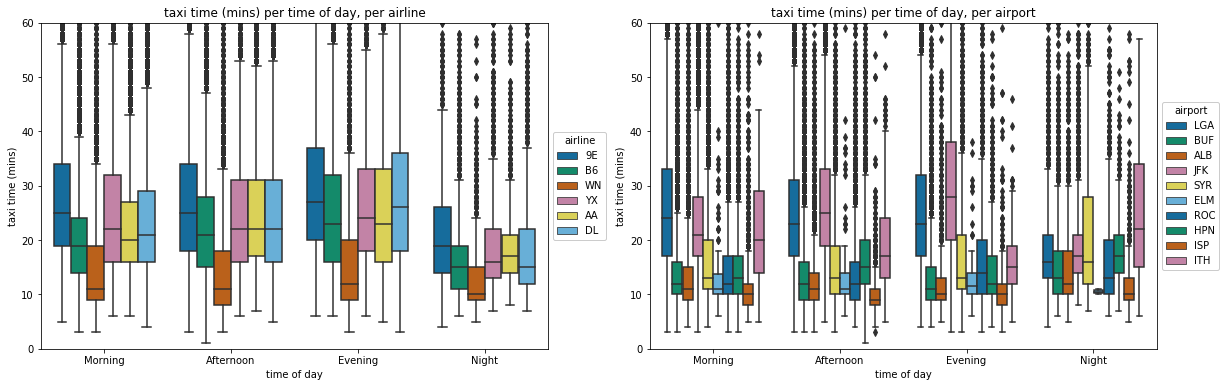

In [109]:
#plot the taxi time per period of day, per airline and per airport
plt.figure(figsize=[20,6])

plt.subplot(1,2,1) #plot per airline
ax1 = sb.boxplot(data = top_airlines_data, x = 'dep_period', y = 'taxi_out', hue = 'op_unique_carrier',
                  dodge = True, palette = 'colorblind',order = time_period)
ax1.legend(bbox_to_anchor=(1, 0.5), loc = 6, ncol = 1, framealpha = 1, title = 'airline')
ax1.set_xlabel('time of day')
ax1.set_ylabel('taxi time (mins)')
ax1.set_title('taxi time (mins) per time of day, per airline')
ax1.set_ylim(0,60) #so we can see the boxes in the plot clearer

plt.subplot(1,2,2) #plot per airport
ax2 = sb.boxplot(data = ny_dep, x = 'dep_period', y = 'taxi_out', hue = 'origin',
                  dodge = True, palette = 'colorblind', order = time_period)
ax2.legend(bbox_to_anchor=(1, 0.5), loc = 6, ncol = 1, framealpha = 1, title = 'airport')
ax2.set_xlabel('time of day')
ax2.set_ylabel('taxi time (mins)')
ax2.set_title('taxi time (mins) per time of day, per airport')
ax2.set_ylim(0,60); #so we can see the boxes in the plot clearer

WestJet again proved the lowest median taxi times, with Endeavour the highest during each period of day. LGA and JFK also displayed this trait.

In [110]:
#how time of day affects departure delay times and taxi times per airport for the six most active airlines

#filter for top airlines
means_day = ny_dep[ny_dep['op_unique_carrier'].isin(top_airlines)]

#find the mean departure delay time per carrier, per month
means_day = means_day.groupby(['dep_period','origin'], as_index=False).mean()


In [111]:
means_day.head()

,dep_period,origin,actual_elapsed_time,air_time,arr_del15,arr_delay,cancelled,day_of_month,delay_type_mins,dep_del15,dep_delay,distance,diverted,taxi_in,taxi_out
0,Afternoon,ALB,134.980938,115.672500,0.185938,1.875625,0.0,15.715625,30.425210,0.179375,7.568437,747.976875,0.0,7.270000,12.038438
1,Afternoon,BUF,109.721673,88.237653,0.201917,3.872313,0.0,15.834544,36.196403,0.186229,8.723417,568.504067,0.0,7.780796,13.703225
2,Afternoon,ELM,87.700000,60.000000,0.150000,-5.100000,0.0,21.400000,18.000000,0.150000,2.900000,332.000000,0.0,7.100000,20.600000
3,Afternoon,HPN,153.618390,127.903287,0.271081,12.000476,0.0,15.936636,44.181019,0.258218,16.604574,874.897094,0.0,7.720343,17.994759
4,Afternoon,ISP,129.244414,114.378470,0.189573,5.885579,0.0,15.622884,38.089286,0.211916,12.470548,725.827353,0.0,5.372376,9.493568


In [112]:
#define function to plot multivariate barplot for dep delays and taxi times per airport per time of day
def m_barplot_2(y,l,t):
    plt.figure(figsize=[24,5])
    ax = sb.barplot(data = means_day, x = 'dep_period', y = y, hue = 'origin', order=time_period, palette='colorblind')
    ax.legend(bbox_to_anchor=(1, 0.5), loc = 6, ncol = 1, framealpha = 1, title = 'airport', prop={'size': 15})
    plt.xlabel('time of day', fontsize=15)
    plt.ylabel(l, fontsize=15)
    plt.title(t);

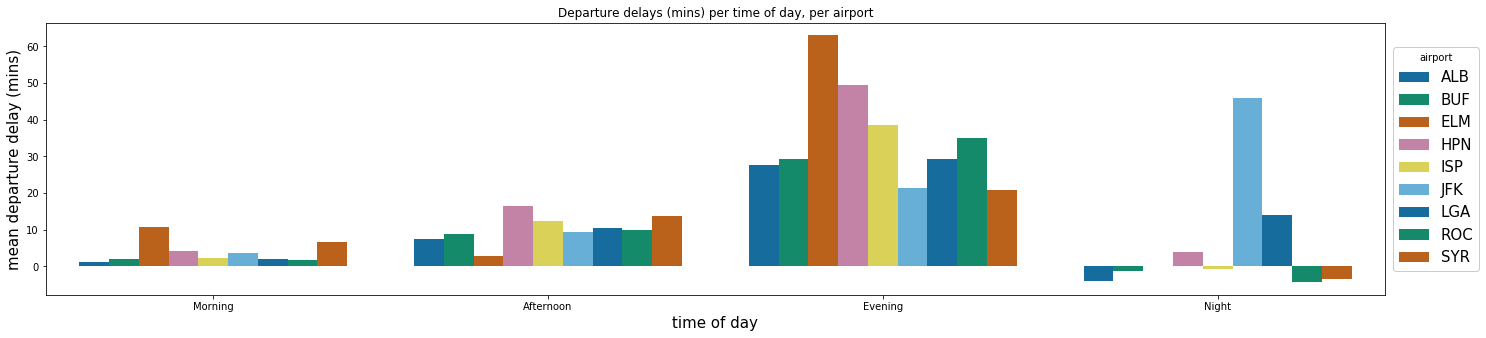

In [113]:
#barplot to show dep delay times per airport for each time of day
m_barplot_2(y='dep_delay', l='mean departure delay (mins)', t='Departure delays (mins) per time of day, per airport');

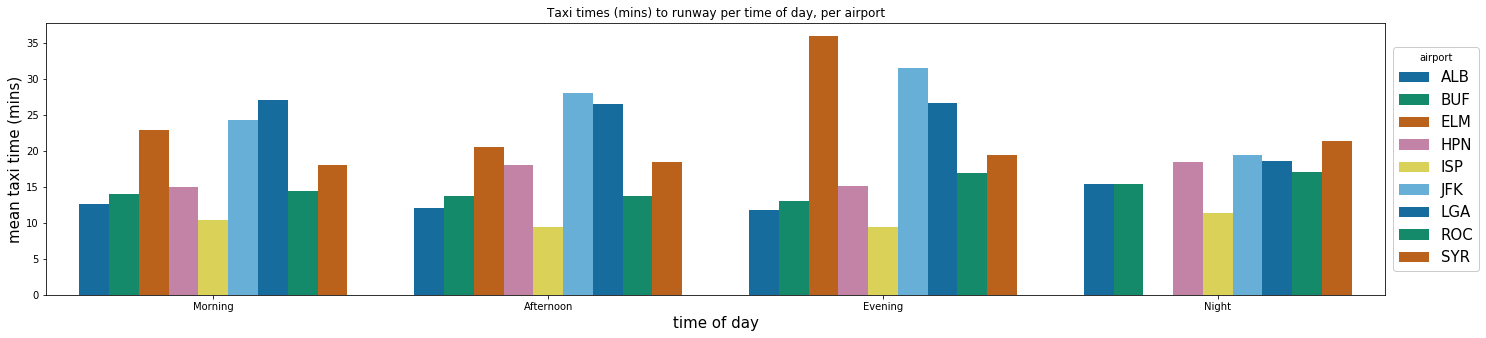

In [114]:
#countplot to show taxi times to runway per airport for each time of day
m_barplot_2(y='taxi_out', l='mean taxi time (mins)', t='Taxi times (mins) to runway per time of day, per airport');

Evenings showed the longest departure delay times, with mornings and afternoons gradually building up delay times. This could be the result of a cumulative effect of delays earlier on in the day pushing operations back further, later in the day. But this is just a prediction.<br>
<br>
Taxi times were a little more consistent throughout the day, however JFK and LGA showed higher taxi times in the evenings. The other exception was ELM with a distinctly long average taxi time in the evenings. For JFK and LGA the longer times could be down to busier air traffic, and for JFK in particular, international air traffic could have an impact on the domestic air traffic.<br>
<br>
JFK at night showed very long departure times. Perhaps this is because of exceptional circumstances which caused flights to depart at night in the first place whem they might usually not, resulting in higher departure delays. This is just speculation though.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> July and August showed the longest mean departure delay times in the year, and this coincided with the peaks in the number of weather related delays reported. The heatmaps reinforced the idea that JFK and LGA were the best airports to spend longer on the tarmac, with Endeavour having the longest mean taxi times at these airports from the top six airlines.

> Evenings were also the best time to travel if you wanted to spend longer seeing planes from your window seat, particularly at JFK, LGA or ELM. However ELM also displayed the longest mean departure delays in the evening too, so perhaps from a delays perspective, ELM would not be the choice of airport.


### Were there any interesting or surprising interactions between features?

> Looking at the data, despite there being significantly smaller numbers of weather delays occurring, they did account for the longer delays to airlines and airports. It could even be the underlying reason behind the pattern of departure delays throughout the year, with longer departure delays recorded in July, August and January, and higher count of weather delays in those months. But with such complex operations in air travel, it would be difficult to pinpoint only one cause behind each outcome.